# Credit EDA Assignment - UpGrad and IIITB

## Introduction

This case study intends to provide an example of how EDA might be used in a real-world corporate setting. Along with applying the skills we learned in the EDA module, we will gain a fundamental grasp of risk analytics in banking and financial services in this case study. We will also discover how data is utilised to reduce the risk of losing money when lending to consumers.

## Business Understanding

Due to the individuals' poor or nonexistent credit histories, lending providers find it difficult to grant loans to them. As a result, some customers take advantage of the situation by defaulting. Consider that you are employed by a consumer finance business that specialised in providing urban clients with different kinds of loans. EDA must be used to analyse the data patterns that are present. This will prevent loan applicants who can repay the loan from being turned down.

When an organisation receives a loan application, it must assess whether to approve the loan based on the applicant's profile. The bank's choice entails two categories of risks:
If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved:
The Company has approved loan Application

Cancelled:
The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

Refused:
The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:
Loan has been cancelled by the client but on different stages of the process.

## Business Objectives

In order to take steps like refusing the loan, lowering the loan amount, charging riskier applicants a higher interest rate, etc., the case study seeks to find trends that show whether a client has problems paying their installments. By doing this, it will be ensured that only borrowers who can repay the loan will be accepted. The objective of this case study is to identify such applications using EDA.

In other words, the organisation seeks to understand the characteristics that are reliable predictors of loan default, also known as the driving factors (or driver variables) behind loan default. This information can be used by the business in portfolio management and risk analysis.

## Data Understanding

1. 'application_data.csv'
It includes all of the client's application-related information. The data is about whether a client has payment difficulties.

2. 'previous_application.csv'
It includes information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

3. 'columns_description.csv'
It is data dictionary which describes the meaning of the variables.

## Code

Importing all the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools

In [3]:
# Reading dataset from local

df=pd.read_csv("application_data.csv")

In [4]:
# Determining the shape of the datset

df.shape

(307511, 122)

In [5]:
# Cleaning the missing data

# listing the null values columns having more than 30%

emptycol=df.isnull().sum()
emptycol=emptycol[emptycol.values>(0.3*len(emptycol))]
len(emptycol)

64

The dataset has 64 columns with null values that are more than 30%.

In [6]:
# Removing those 64 columns
emptycol = list(emptycol[emptycol.values>=0.3].index)
df.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

64


In [7]:
# Checking the columns having less null percentage

df.isnull().sum()/len(df)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


"AMT_ANNUITY" columns is having very few null values rows. Hence let's try to impute the missing values

Since this column is having an outlier which is very large it will be inappropriate to fill those missing values with mean, Hence Median comes to rescue for this and we will fill those missing banks with median value

In [8]:
# Filling missing values with median

values=df['AMT_ANNUITY'].median()

df.loc[df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [9]:
# Searching for the column for null values

df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

Now, all columns contain zero null values.

In [10]:
# Removing rows having null values greater than or equal to 30%

emptyrow=df.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.3*len(df)].index)
df.drop(labels=emptyrow,axis=0,inplace=True)
print(len(emptyrow))

0


In [11]:
# We will remove unwanted columns from this dataset

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=unwanted,axis=1,inplace=True)

There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

In [12]:
# let's find these categorical columns having these 'XNA' values
    
# For Gender column

df[df['CODE_GENDER']=='XNA'].shape

(4, 28)

In [13]:
# For Organization column

df[df['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 28)

So,the Gender column contains 4 rows, and the Organisation type column contains 55374 entries.

In [14]:
# Describing the Gender column to check the number of females and males

df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

We can update such columns with Gender "F" as there won't be any effects on the dataset because Female is the majority and only 4 rows have NA values.

In [15]:
# Updating the column 'CODE_GENDER' with "F" for the dataset

df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [16]:
# Describing the organization type column

df['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

So, for column 'ORGANIZATION_TYPE', we have total count of 307511 rows of which 55374 rows are having 'XNA' values. Which means 18% of the column is having this values. Hence if we drop the rows of total 55374, will not have any major impact on our dataset.

In [17]:
# Hence, dropping the rows of total 55374 have 'XNA' values in the organization type column

df=df.drop(df.loc[df['ORGANIZATION_TYPE']=='XNA'].index)
df[df['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

In [18]:
# Casting all variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df[numeric_columns]=df[numeric_columns].apply(pd.to_numeric)
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,THURSDAY,11,0,0,0,0,1,1,Religion


### Derived Metrics

Now, Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [19]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [20]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slots)

In [21]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0_df=df.loc[df["TARGET"]==0]
target1_df=df.loc[df["TARGET"]==1]

In [22]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

round(len(target0_df)/len(target1_df),2)

10.55

The Imbalance ratio is 10.55

### Univariate analysis for categories

Now, doing Categorical Univariate Analysis in logarithmic scale for target=0(client with no payment difficulties)

In [23]:
# Count plotting in logarithmic scale

def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

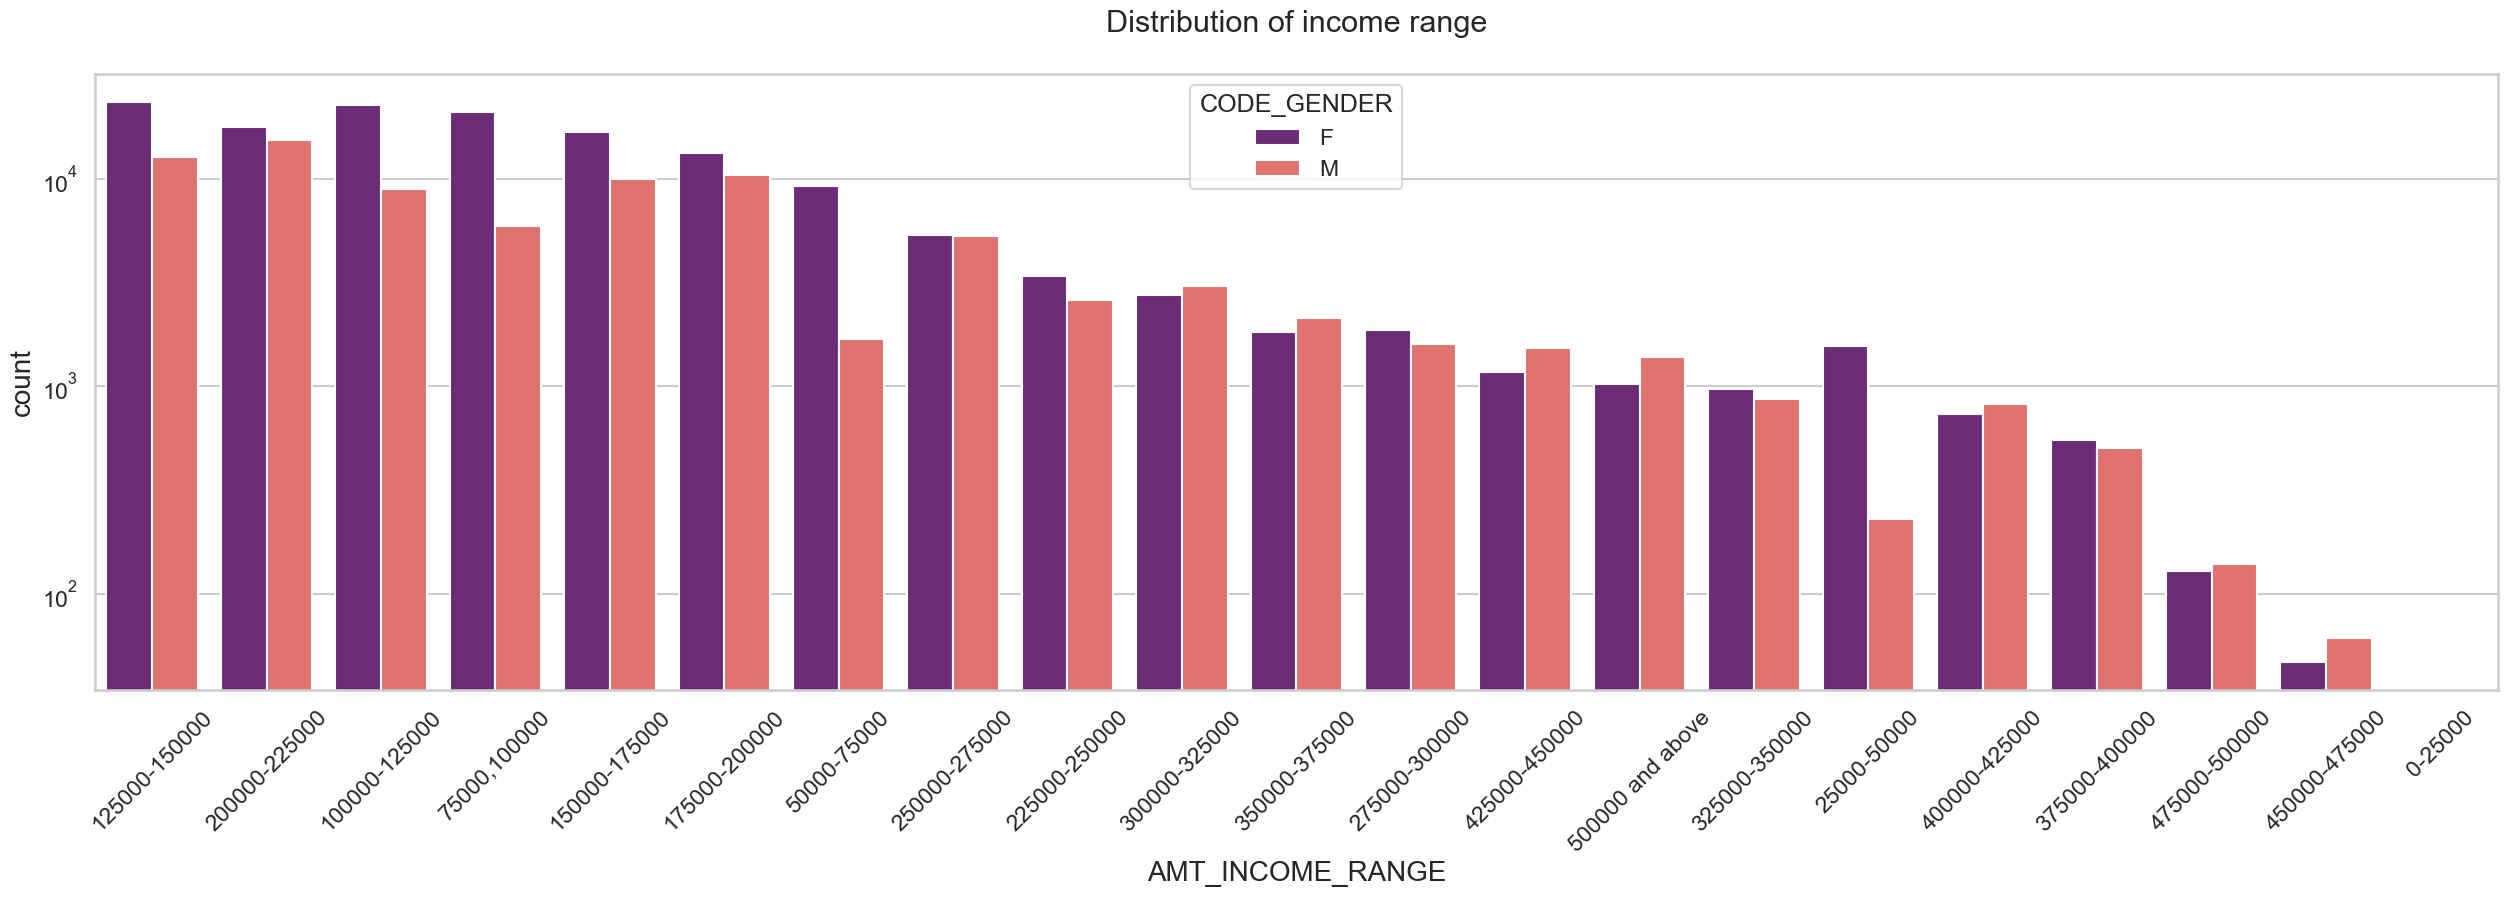

In [24]:
# PLotting for income range

uniplot(target0_df,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

Conclusions to be drawn from the graph above.

1.Male numbers are lower than female counts.
2.The income level between 100,000 and 200,000 has the most credits.
3.This graph demonstrates that more women than men have credits in that range.
4.For incomes of 400,000 and above, very few people are considered.

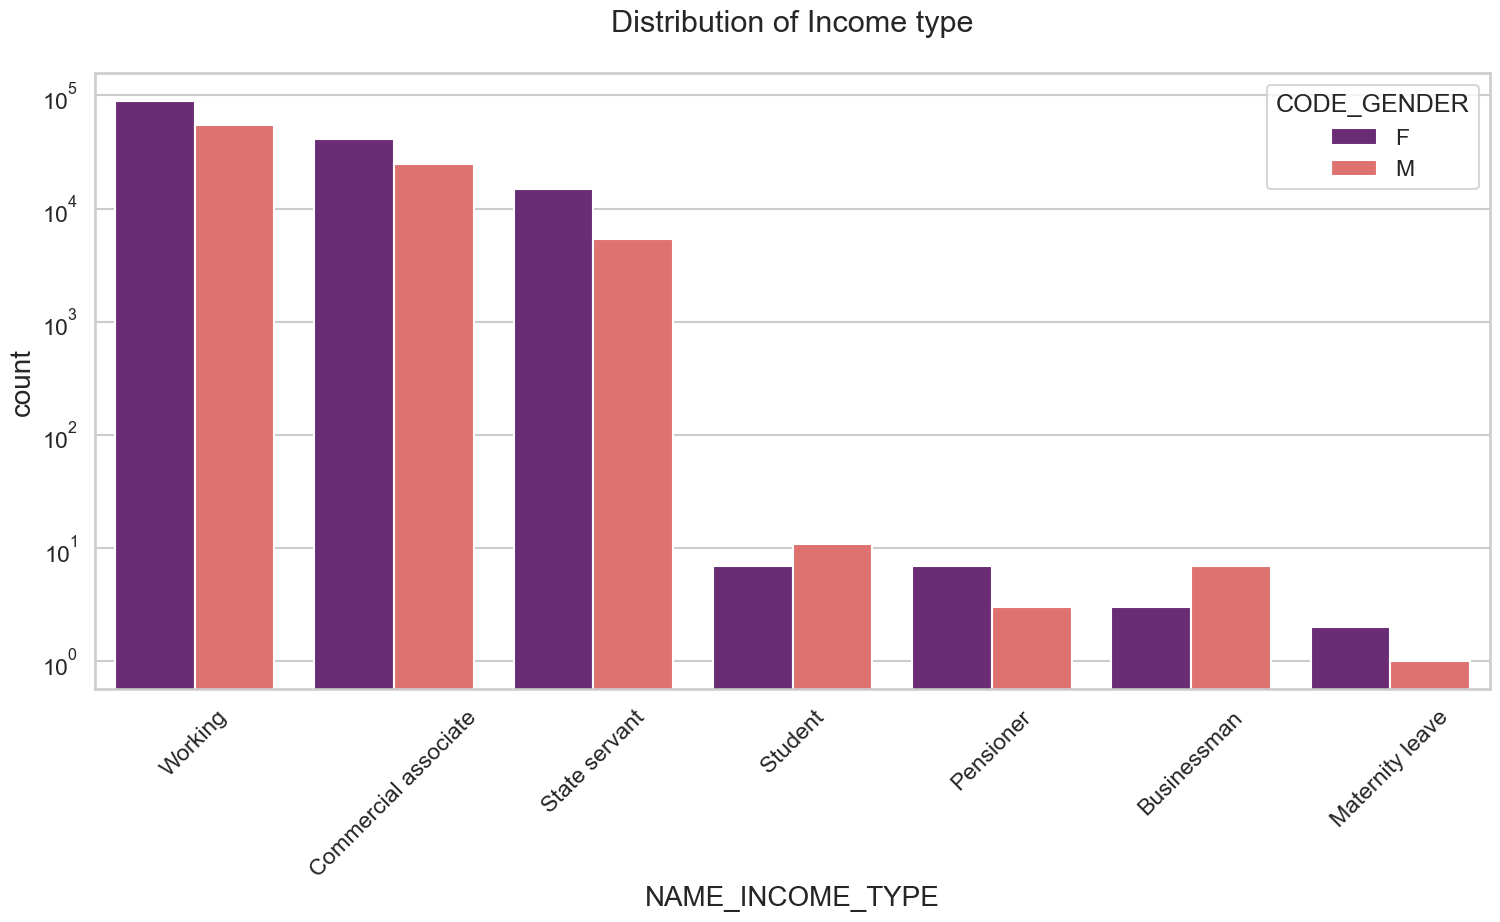

In [25]:
# Plotting for Income type

uniplot(target0_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

Conclusions to be drawn from the graph above.

1.There are more credits available for income types "working," "commercial associate," and "state servant" than for the others.
2.For this reason, women have more credits than men do.
3.Less credits are available for income categories such "student," "pensioner," "businessman," and "maternity leave."

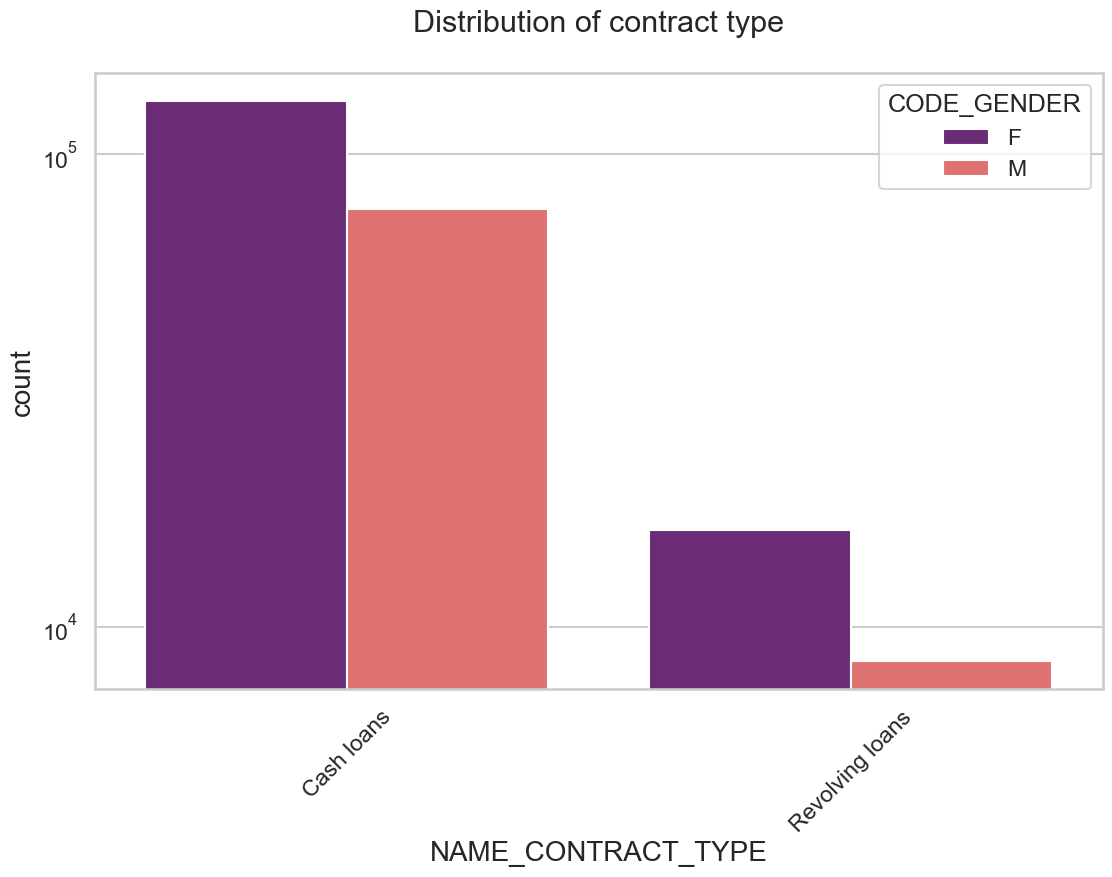

In [26]:
# Plotting for Contract type

uniplot(target0_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Conclusions to be drawn from the graph above.

1.Cash loans, as a contract type, have a greater number of credits than revolving loans.
2.Additionally, women are more likely than men to apply for credit.

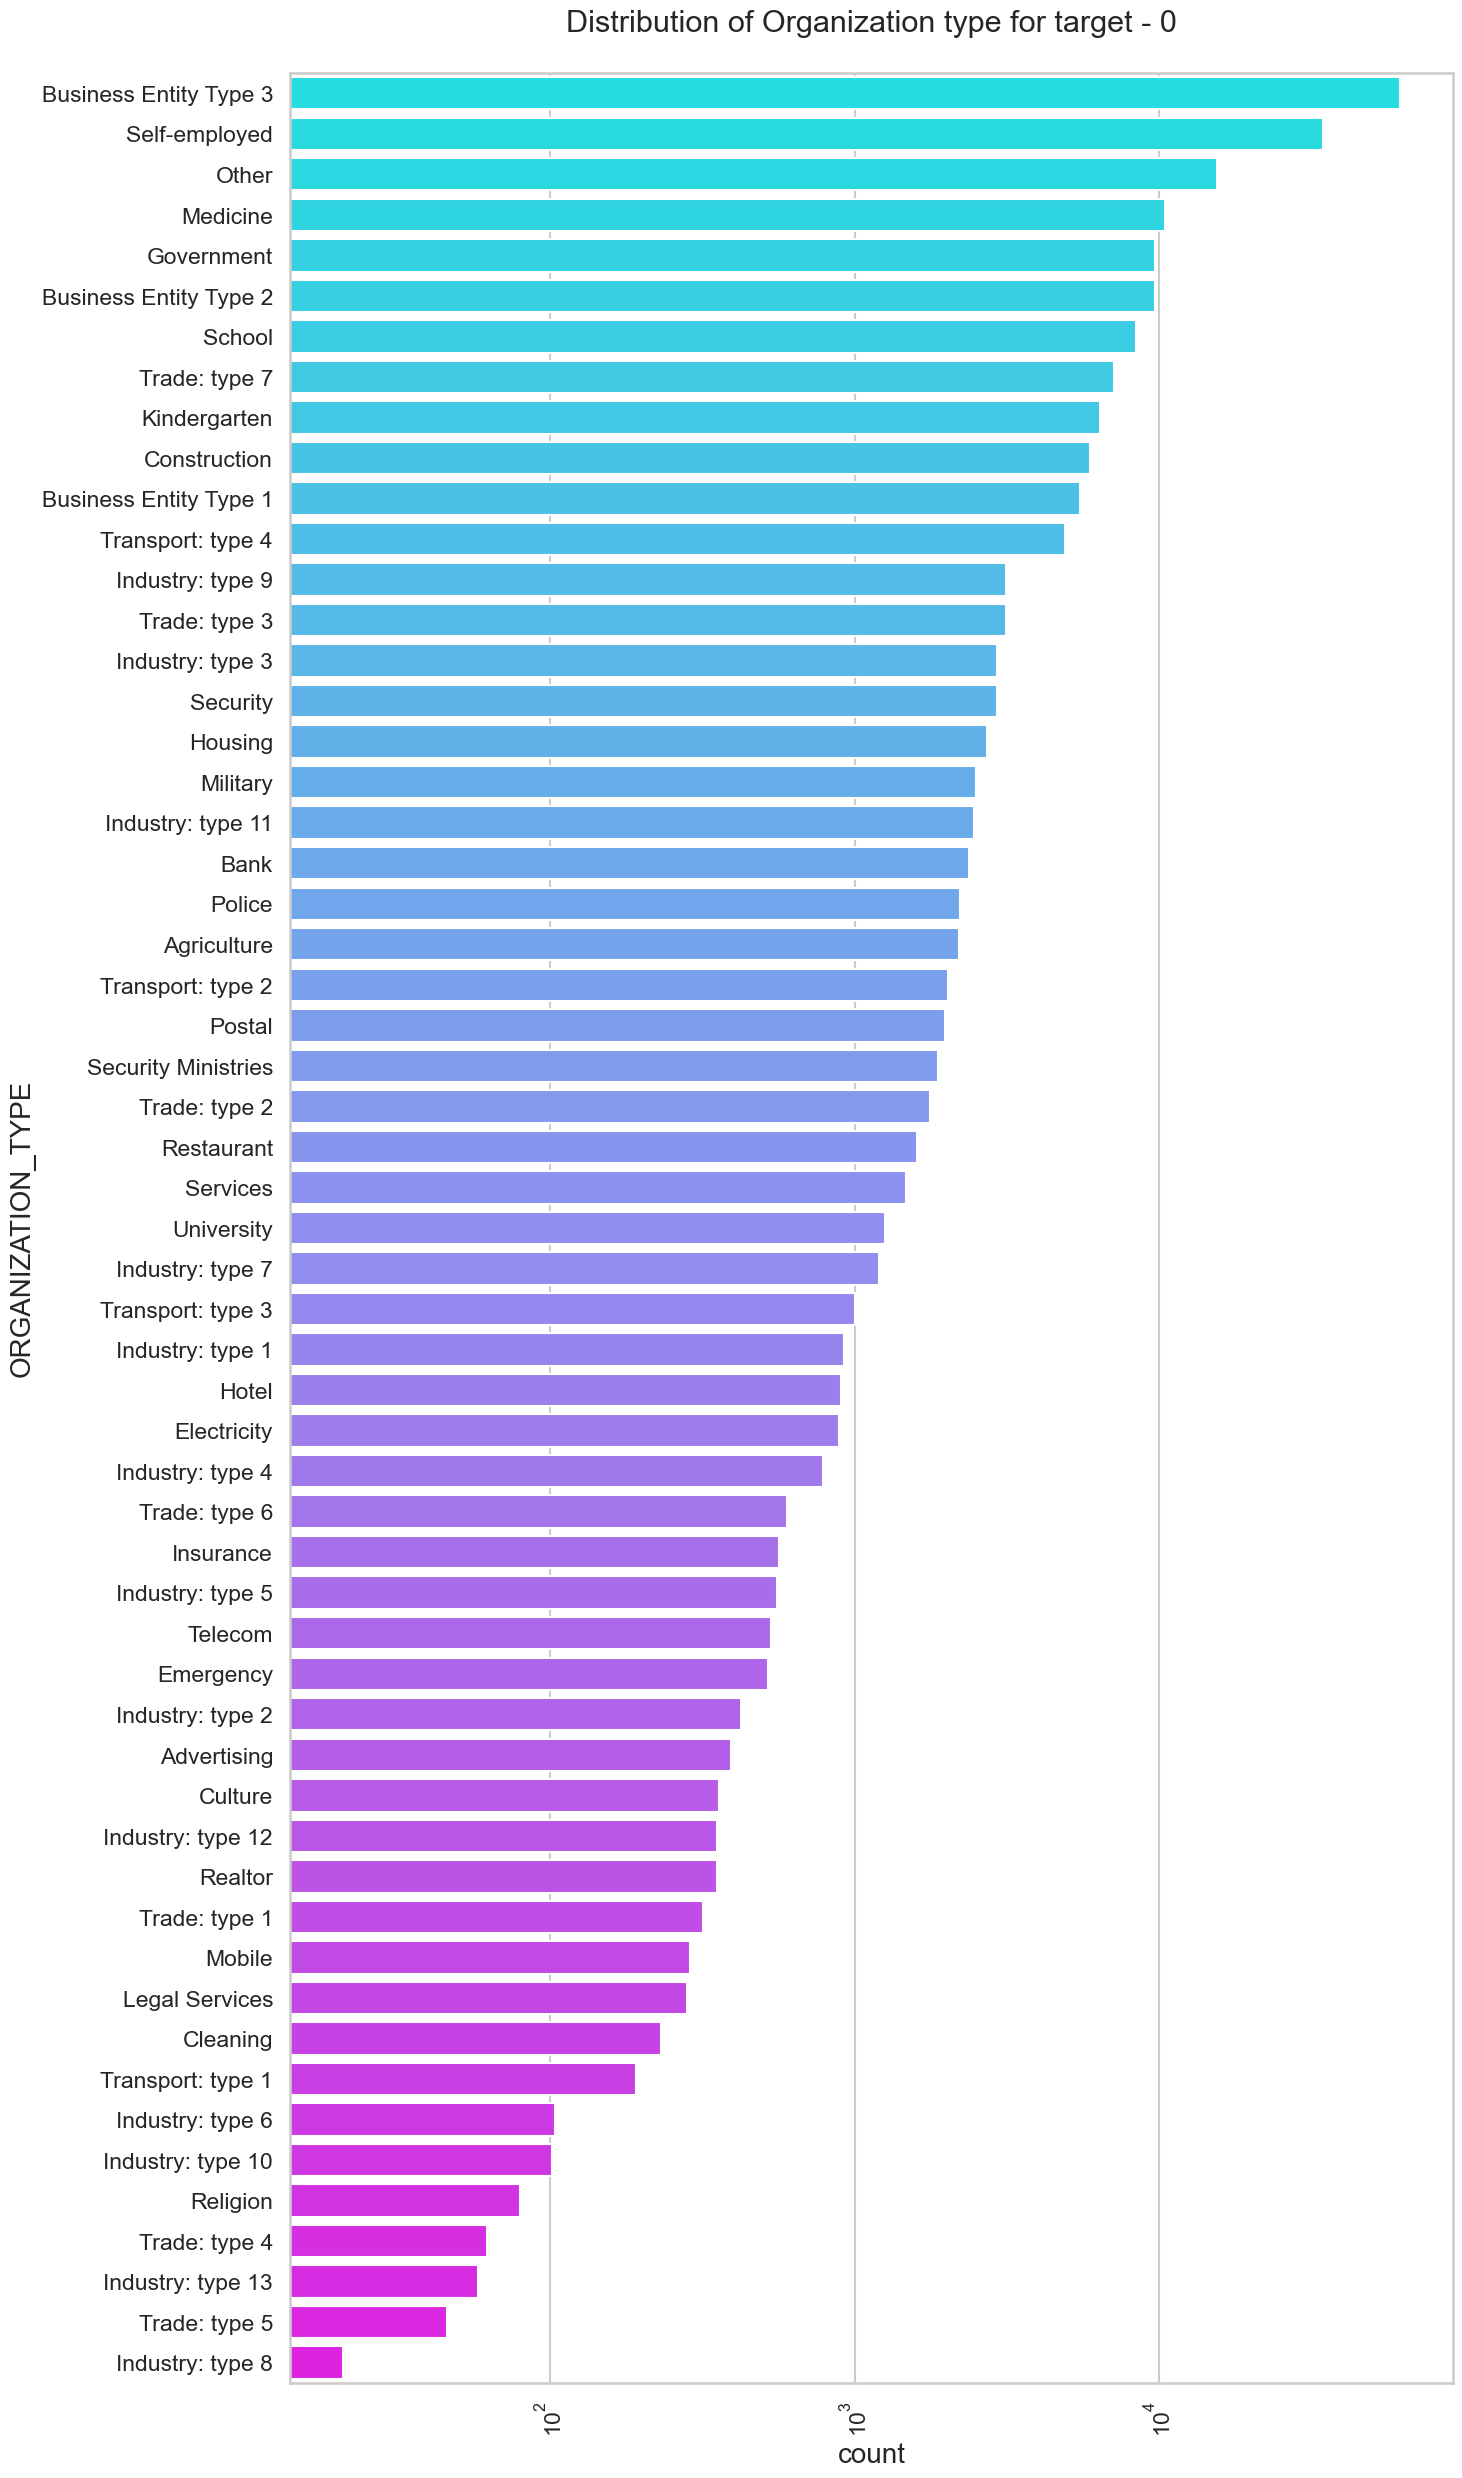

In [27]:
# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

Conclusions to be drawn from the graph above.

1.The majority of the clients who have requested credit are from the organisation types "Business entity Type 3," "Self employed," "Other," "Medicine," and "Government."
2.Less customers come from industry types 8, 6, 10, religion, and type 5 and type 4 trade.

 Now, doing Categoroical Univariate Analysis in logarithmic scale for target=1(client with payment difficulties)

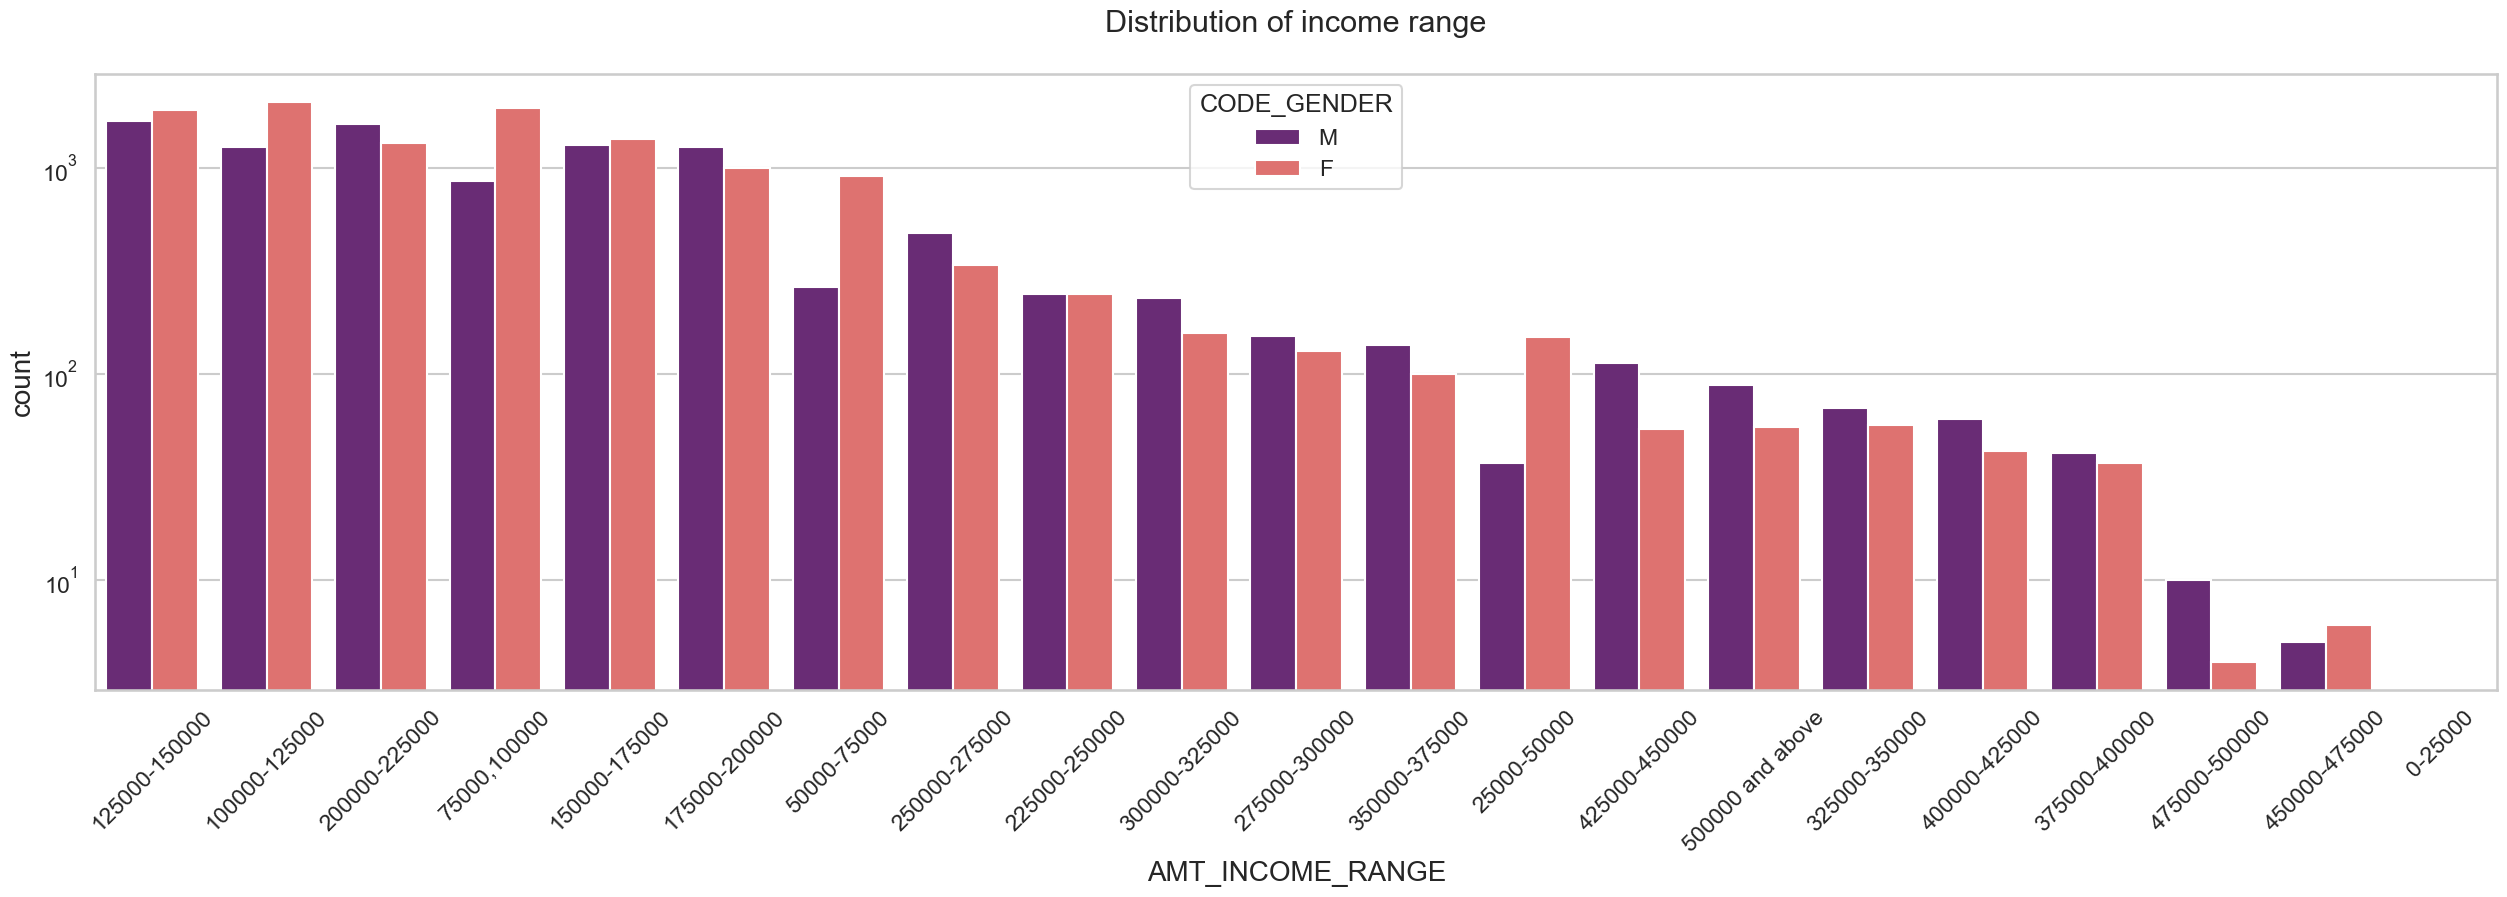

In [28]:
# PLotting for income range

uniplot(target1_df,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

Conclusions to be drawn from the graph above.

1.Male counts are higher than female.
2.The income level between 100,000 and 200,000 has the most credits.
3.According to this graph, men have more credits in that range than women do.
4.For incomes of 400,000 and above, very few people are considered

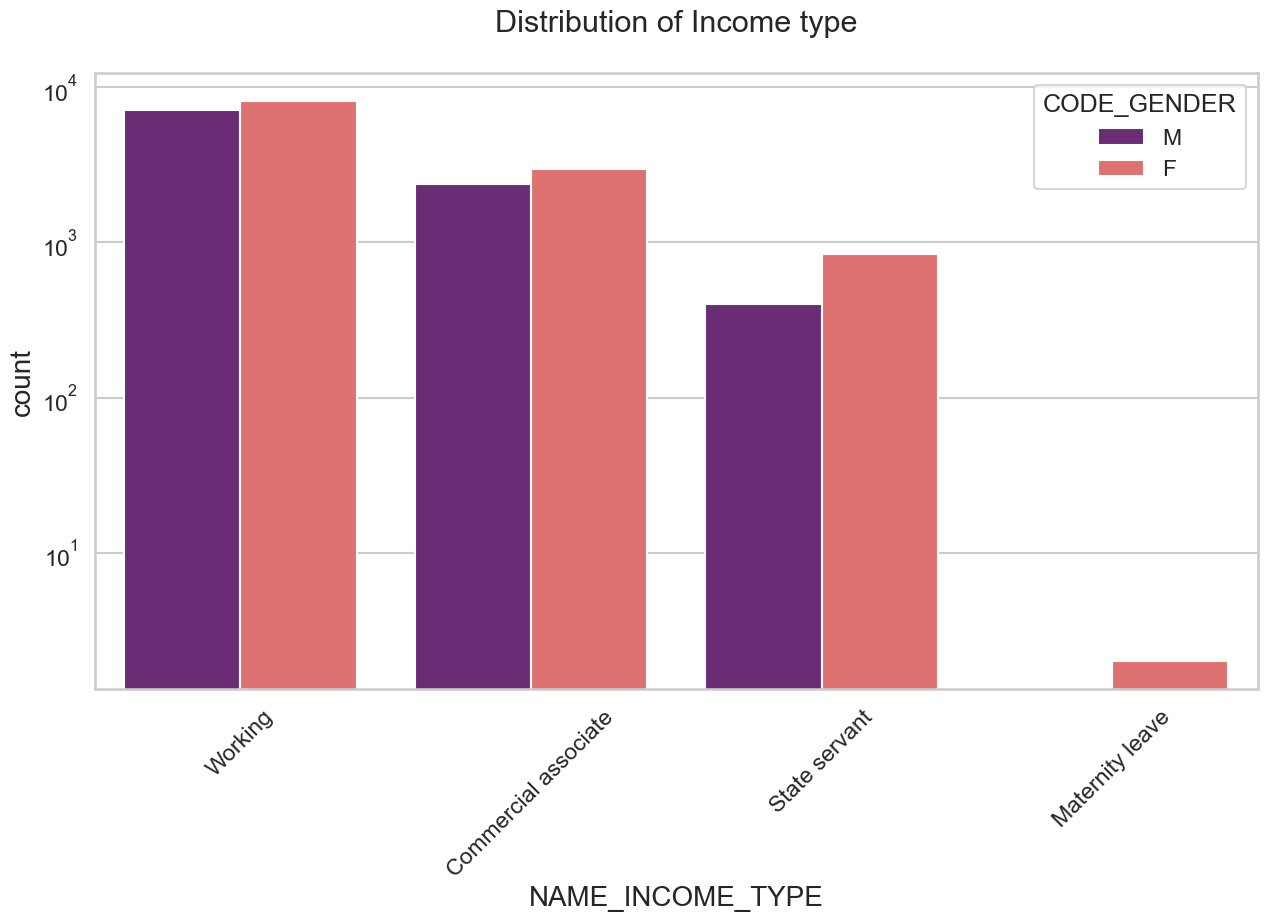

In [29]:
# Plotting for Income type

uniplot(target1_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

Conclusions to be drawn from the graph above.

1.The number of credits is higher for income types such as "working," "commercial associate," and "State Servant" than for other types, such as "Maternity leave."
2.For this reason, women have more credits than men do.
3.'Maternity leave' income category receives fewer credits.
4.For type 1, "student," "pensioner," and "businessman" have no income types, which suggests they don't practise late payments.

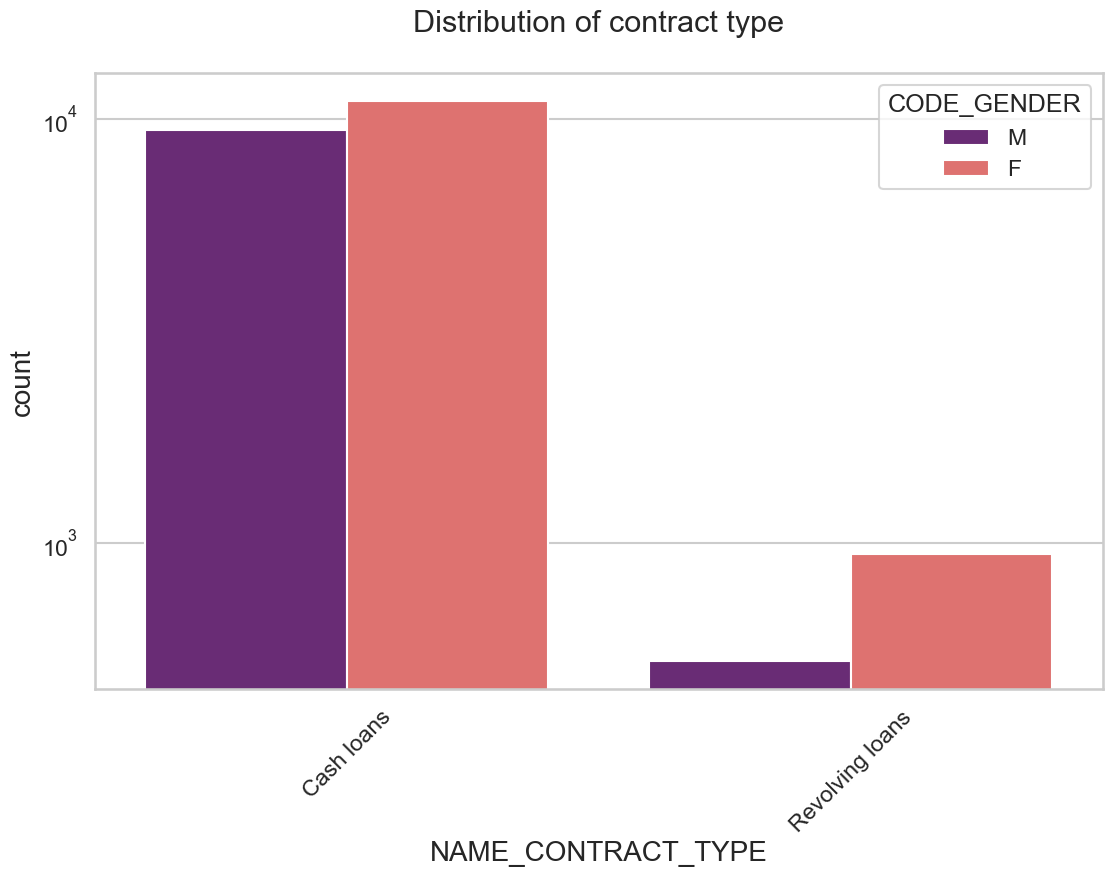

In [30]:
# Plotting for Contract type

uniplot(target1_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Conclusions to be drawn from the graph above.

1.Cash loans, as a contract type, have a greater number of credits than revolving loans.
2.Additionally, women are more likely than men to apply for credit.
3.There are only female revolving loans for type 1.

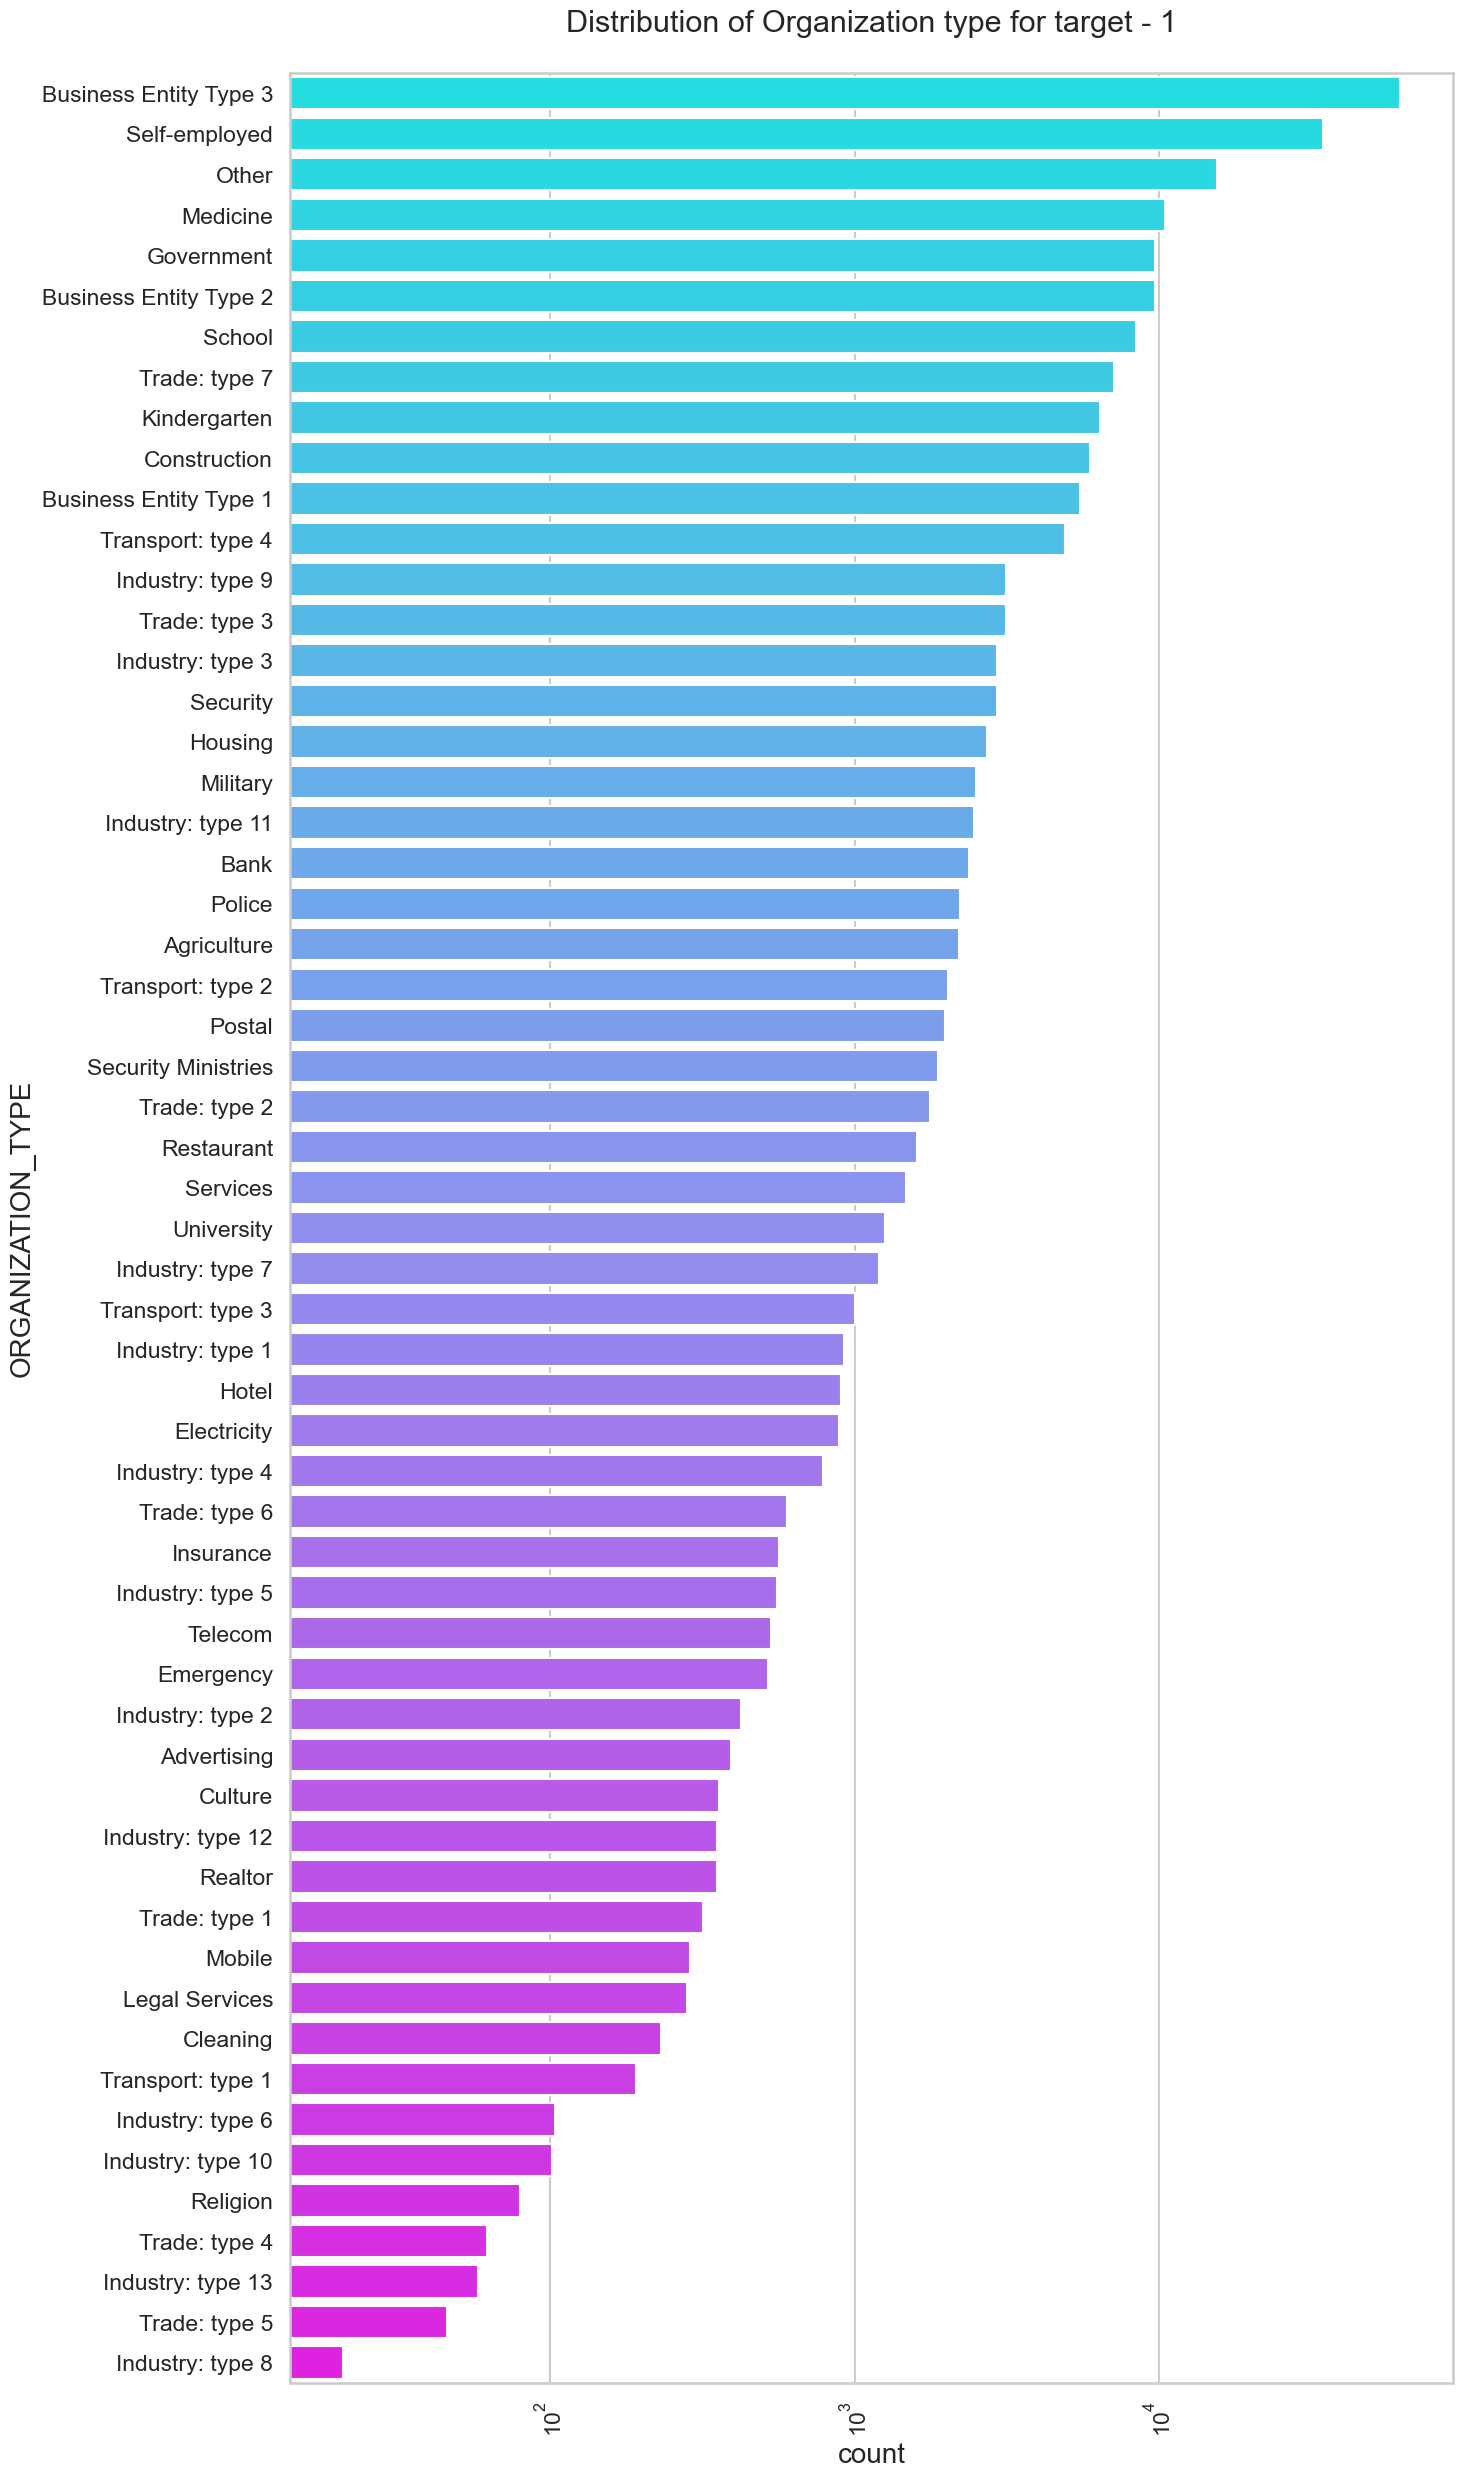

In [31]:
# Plotting for Organization type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

Conclusions to be drawn from the graph above.

1.The majority of the clients who have requested credit are from the organisation types "Business entity Type 3," "Self employed," "Other," "Medicine," and "Government."
2.Less customers come from industry types 8, 6, 10, religion, and type 5 and type 4 trade.
3.In the distribution of organisation type, the same as type 0.

In [32]:
# Finding some correlation for numerical columns for both target 0 and 1 

target0_corr=target0_df.iloc[0:,2:]
target1_corr=target1_df.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [33]:
# Correlation for target 0

target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.021950,-0.023652,-0.010795,-0.030579,0.266534,0.030948,0.155518,-0.119164,-0.030162,-0.022813,-0.015475,-0.005576,0.002344,0.007487,0.013295
AMT_INCOME_TOTAL,-0.021950,1.000000,0.403876,0.472204,0.110074,-0.054666,-0.060868,0.040559,-0.036702,0.073503,0.077634,0.159962,0.148281,-0.001023,-0.013856,-0.004758
AMT_CREDIT,-0.023652,0.403876,1.000000,0.826689,0.060706,-0.169030,-0.104251,-0.015318,-0.038197,0.036923,0.015118,0.041693,0.045175,-0.040616,-0.037000,-0.011194
AMT_ANNUITY,-0.010795,0.472204,0.826689,1.000000,0.064328,-0.100287,-0.074643,0.010712,-0.027354,0.032953,0.033435,0.070841,0.069051,-0.019954,-0.024085,-0.008087
REGION_POPULATION_RELATIVE,-0.030579,0.110074,0.060706,0.064328,1.000000,-0.041663,0.000900,-0.042400,-0.010299,0.133213,-0.025292,0.032446,0.056814,-0.049779,-0.034808,-0.007332
DAYS_BIRTH,0.266534,-0.054666,-0.169030,-0.100287,-0.041663,1.000000,0.307787,0.265449,0.083331,0.051299,0.058627,0.038104,0.012789,0.167477,0.111539,0.029007
DAYS_EMPLOYED,0.030948,-0.060868,-0.104251,-0.074643,0.000900,0.307787,1.000000,0.126708,0.106823,0.026444,0.065435,0.086966,0.063533,0.118224,0.125954,0.069567
DAYS_REGISTRATION,0.155518,0.040559,-0.015318,0.010712,-0.042400,0.265449,0.126708,1.000000,0.036788,-0.029553,0.017715,0.015092,0.007716,0.038064,0.047339,0.027231
DAYS_ID_PUBLISH,-0.119164,-0.036702,-0.038197,-0.027354,-0.010299,0.083331,0.106823,0.036788,1.000000,0.008538,0.027302,0.020823,0.008525,0.054875,0.033427,0.001476
HOUR_APPR_PROCESS_START,-0.030162,0.073503,0.036923,0.032953,0.133213,0.051299,0.026444,-0.029553,0.008538,1.000000,0.051744,0.067352,0.053813,0.011287,-0.005971,-0.010720


In [34]:
# Correlation for target 1

target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.039123,0.000427,0.015133,-0.029682,0.175025,0.006823,0.110854,-0.091042,-0.040338,-0.035213,-0.040853,-0.027993,-0.016072,-0.005444,0.009557
AMT_INCOME_TOTAL,-0.039123,1.000000,0.364559,0.428947,0.058005,-0.103026,-0.053798,0.011378,-0.051113,0.078779,0.075615,0.156374,0.145982,-0.003813,-0.006241,0.004230
AMT_CREDIT,0.000427,0.364559,1.000000,0.812093,0.043545,-0.200718,-0.107605,-0.021973,-0.065143,0.024616,0.015043,0.032536,0.034861,-0.030974,-0.032882,-0.012465
AMT_ANNUITY,0.015133,0.428947,0.812093,1.000000,0.028666,-0.100200,-0.060193,0.019762,-0.044128,0.021129,0.029646,0.060363,0.059724,-0.011744,-0.015938,-0.003012
REGION_POPULATION_RELATIVE,-0.029682,0.058005,0.043545,0.028666,1.000000,-0.044444,-0.015246,-0.033490,-0.017779,0.109400,-0.032702,-0.008160,0.012602,-0.057239,-0.044761,-0.014753
DAYS_BIRTH,0.175025,-0.103026,-0.200718,-0.100200,-0.044444,1.000000,0.256870,0.192350,0.146246,0.041994,0.046320,0.022208,0.000356,0.145884,0.096181,0.009633
DAYS_EMPLOYED,0.006823,-0.053798,-0.107605,-0.060193,-0.015246,0.256870,1.000000,0.086286,0.104244,0.010328,0.069566,0.082264,0.056081,0.118869,0.139863,0.069316
DAYS_REGISTRATION,0.110854,0.011378,-0.021973,0.019762,-0.033490,0.192350,0.086286,1.000000,0.061563,-0.044753,0.006362,0.000896,-0.001416,0.015831,0.039204,0.026105
DAYS_ID_PUBLISH,-0.091042,-0.051113,-0.065143,-0.044128,-0.017779,0.146246,0.104244,0.061563,1.000000,0.012709,0.024860,0.013162,0.002567,0.048184,0.015838,-0.015598
HOUR_APPR_PROCESS_START,-0.040338,0.078779,0.024616,0.021129,0.109400,0.041994,0.010328,-0.044753,0.012709,1.000000,0.050953,0.063877,0.050300,0.003947,0.004775,0.002319


In [35]:
# Now, plotting the above correlation with heat map as it is the best choice to visulaize

# figure size

def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


    sns.heatmap(data, cmap="RdYlGn",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

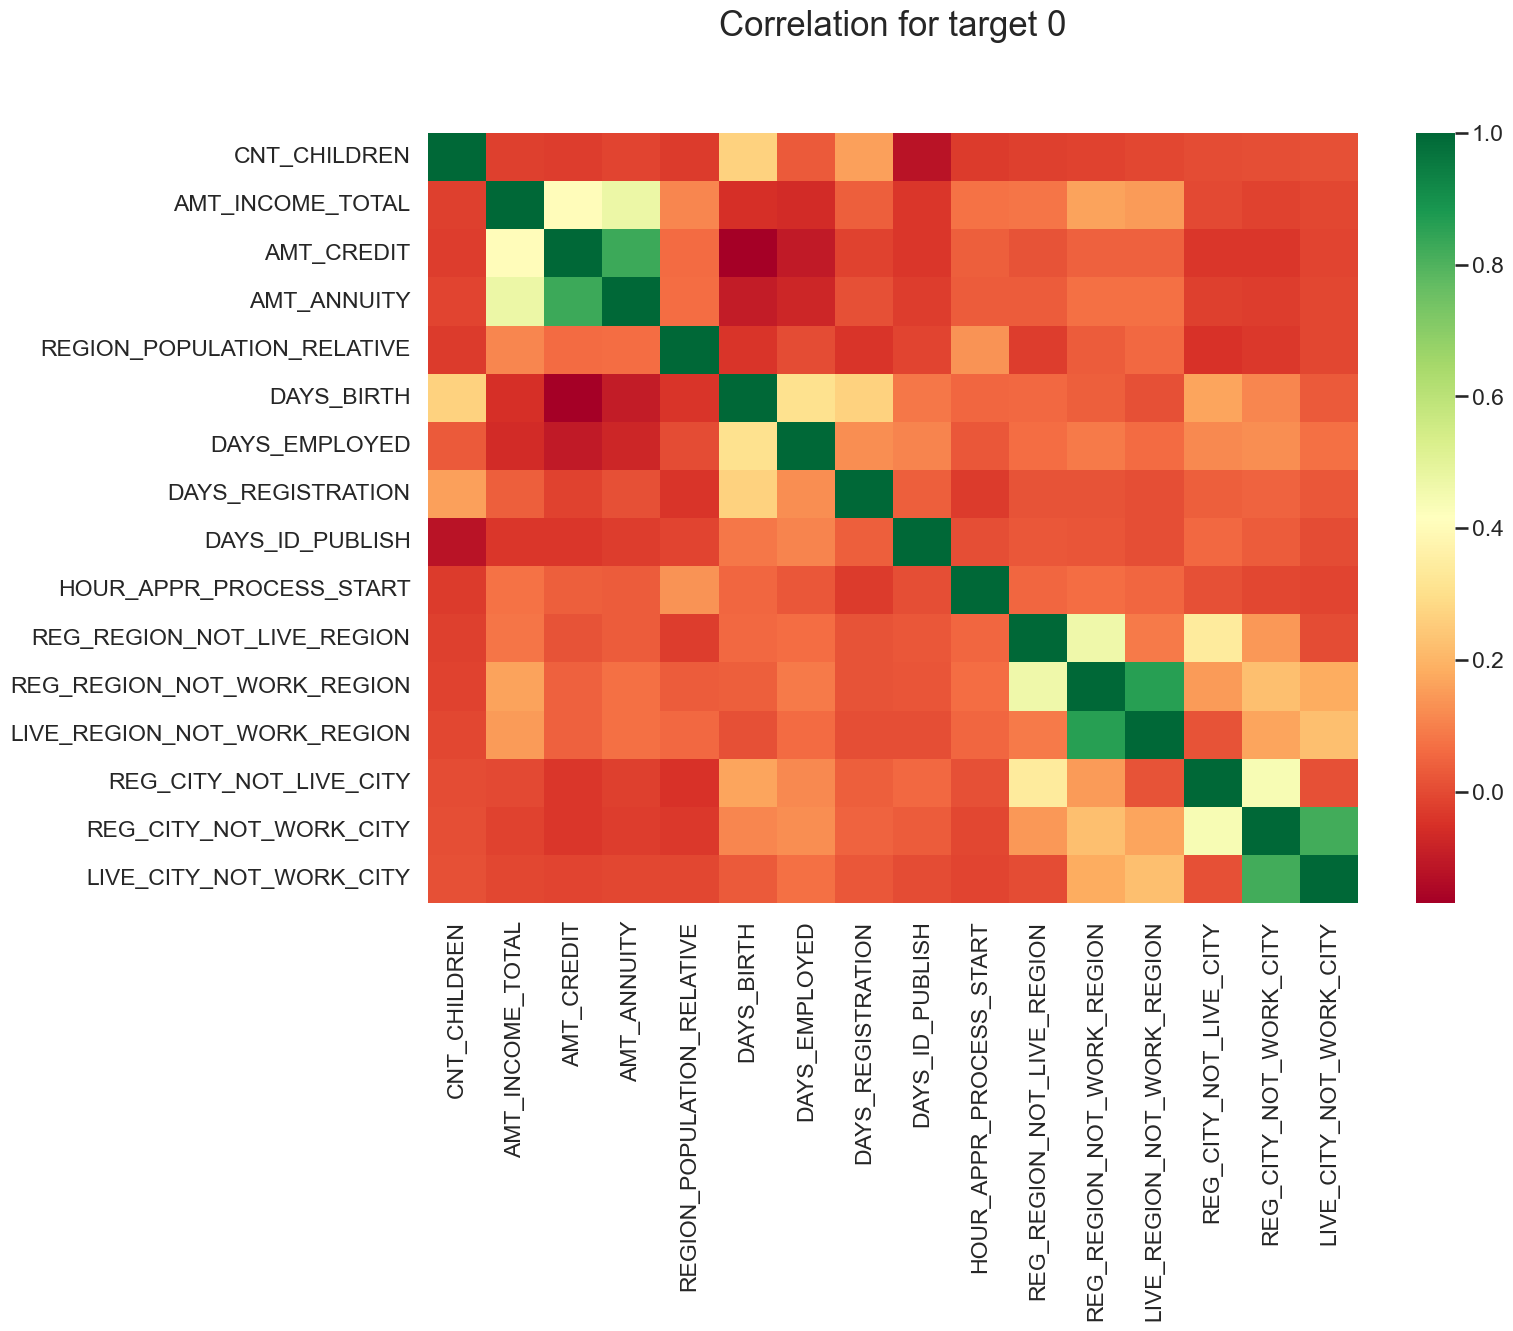

In [37]:
# For Target 0

targets_corr(data=target0,title='Correlation for target 0')

There are other observations we may make, as shown by the heatmap of correlation up top.

1.Since credit amount and  date of birth are inversely related,which means Credit amount is higher for low age and vice-versa.
2.Credit amount is inversely proportional to the number of children client have, which means Credit amount is higher for less children count client have and vice-versa.
3.Income amount is inversely proportional to the number of children client has, therefore a client with fewer children will have more income than a client with more children.
4.In a heavily populated location, clients have fewer children.
5.Credit is given in greater amounts to heavily inhabited areas.
6.In areas with high population density, income is also higher.

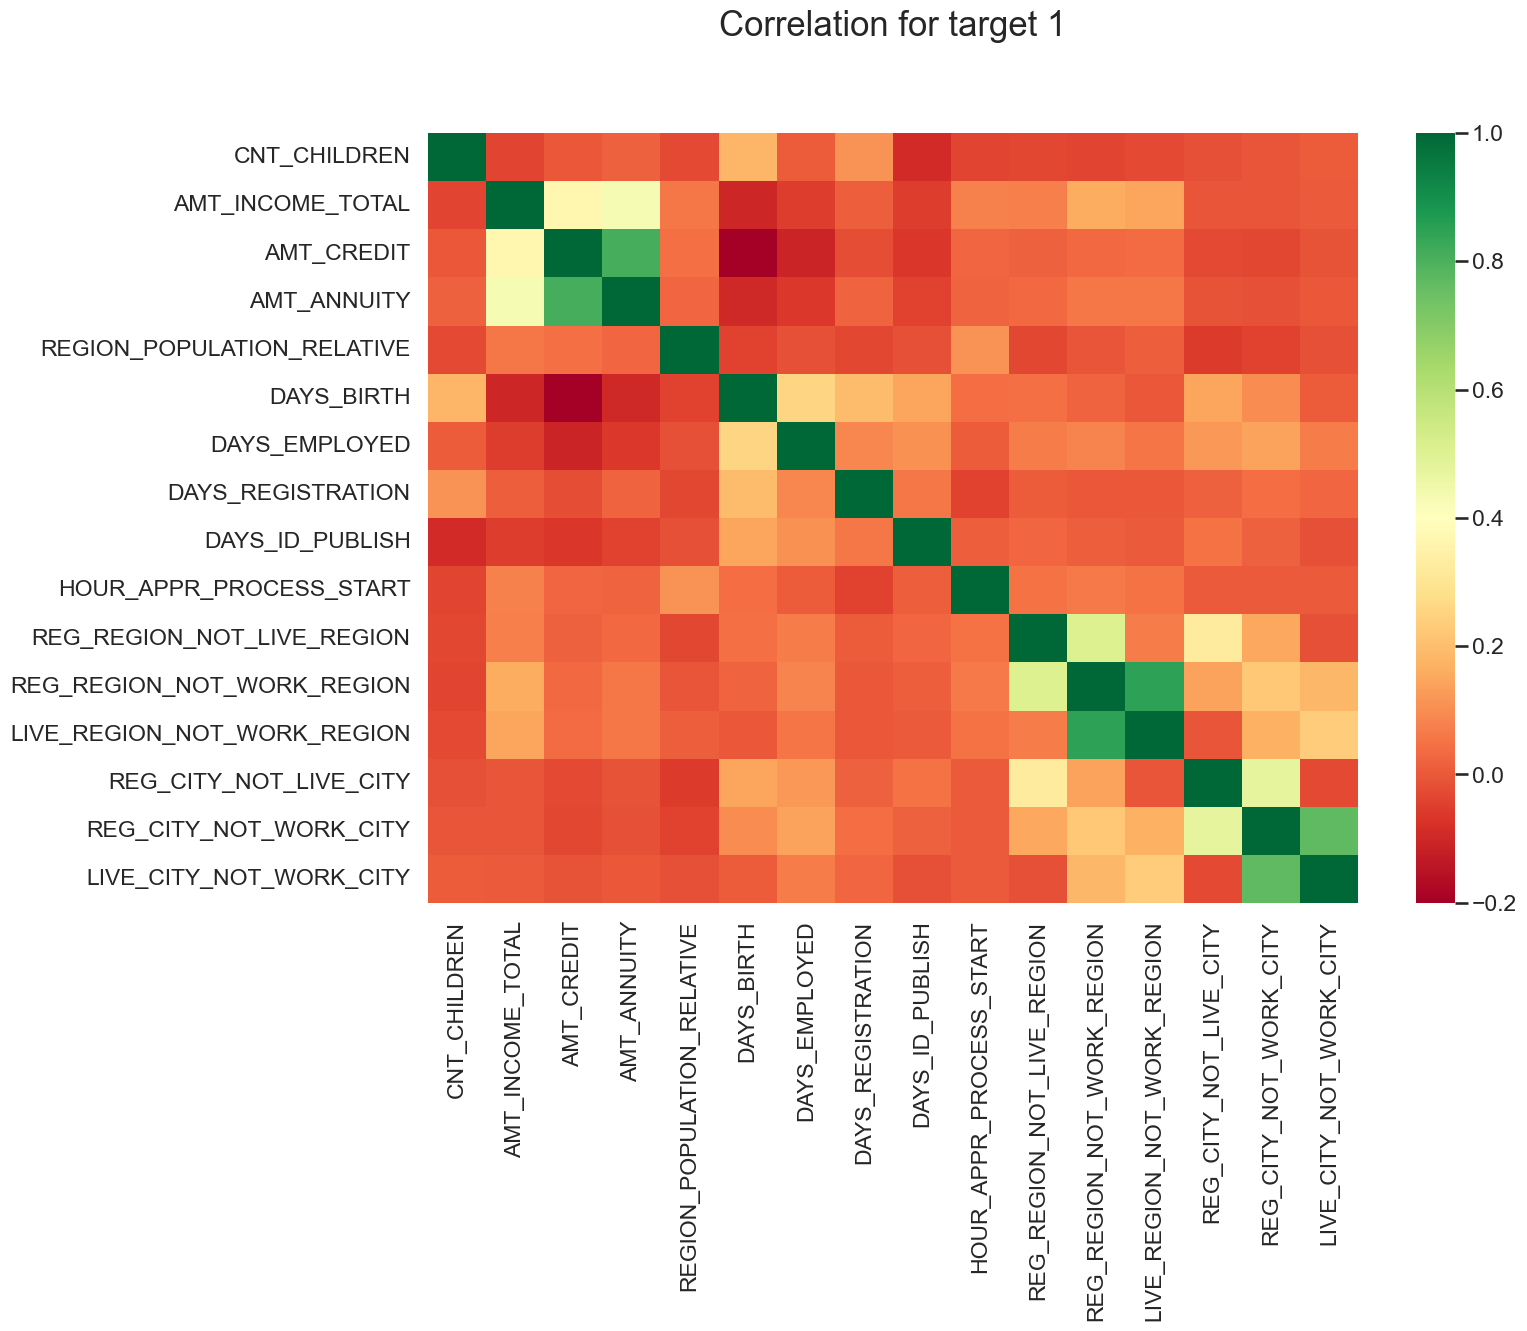

In [36]:
# For Target 1

targets_corr(data=target1,title='Correlation for target 1')

Similar observations to those for Target 0 are included in this heat map for Target 1. However, there are some differences. Below is a list of them.

1.There are fewer children being born at the client's permanent address than at their contact address, and vice versa.

2.Less children are being born to clients whose permanent addresses differ from their work addresses, and vice versa

### Univariate analysis for variables

In [43]:
# Box plotting for univariate variables analysis in logarithmic scale

def univariate_numerical(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =target1_df, y=col,orient='v')
    plt.show()

#### For Target 0 - Finding any outliers

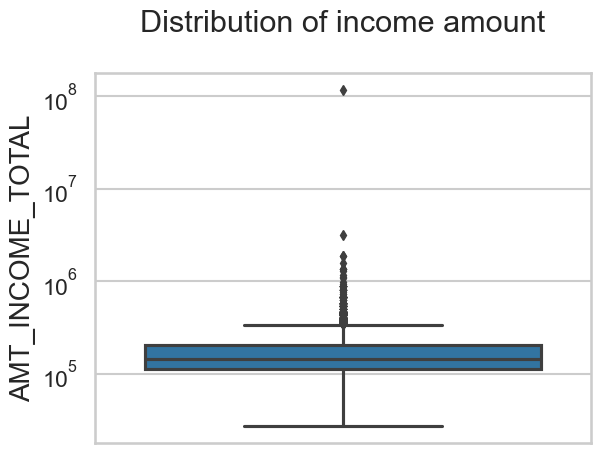

In [44]:
# Distribution of income amount

univariate_numerical(data=target0_df,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

A few conclusions can be drawn from the graph above.

1.In terms of revenue, some outliers have been identified .
2.With regard to income, the third quartile is extremely low.

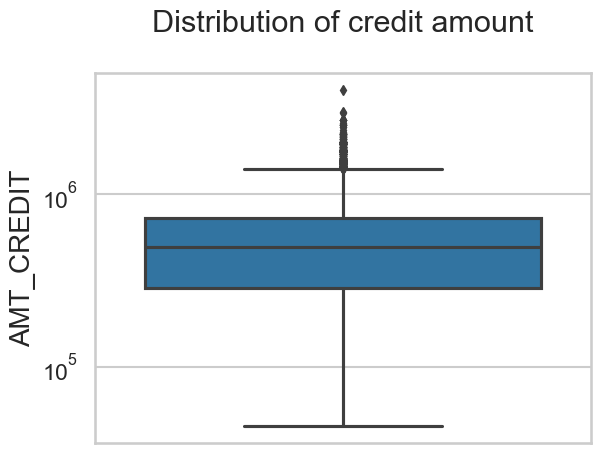

In [45]:
# Disrtibution of credit amount

univariate_numerical(data=target0_df,col='AMT_CREDIT',title='Distribution of credit amount')

A few conclusions can be drawn from the graph above.

1.There are a few outliers in the credit amount.
2.The majority of client credits are found in the first quartile since it is larger than the third quartile in terms of credit quantity.

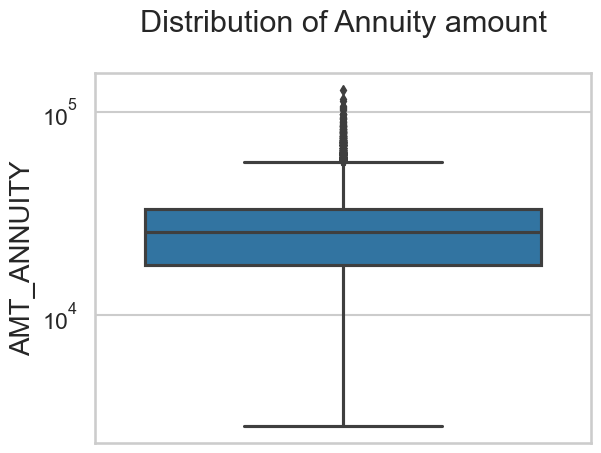

In [46]:
# Distribution of anuuity amount

univariate_numerical(data=target0_df,col='AMT_ANNUITY',title='Distribution of Annuity amount')

A few conclusions can be drawn from the graph above.

1.In the annuity amount, some outliers have been found.
2.The first quartile accounts for the majority of annuity clients since it has a larger annuity amount than the third quartile.

#### For Target 1 - Finding any outliers

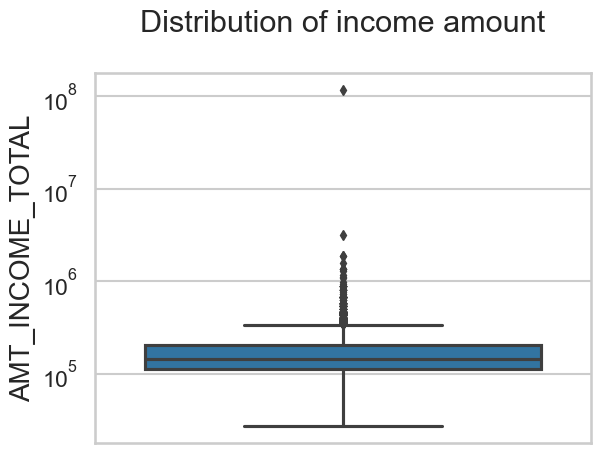

In [47]:
# Distribution of income amount

univariate_numerical(data=target1_df,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

A few conclusions can be drawn from the graph above.

1.In terms of revenue, some outliers have been found. 
2.With regard to income, the third quartile is extremely low.
3.The first quartile is where the majority of income clients are located.

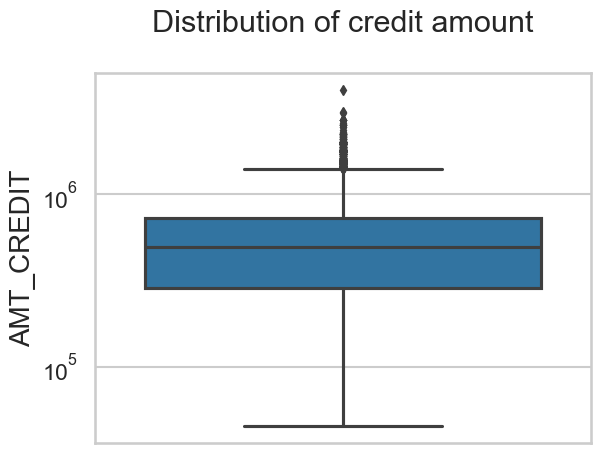

In [48]:
# Distribution of credit amount

univariate_numerical(data=target1_df,col='AMT_CREDIT',title='Distribution of credit amount')

A few conclusions can be drawn from the graph above.

1.There are a few outliers in the credit amount.
2.The majority of client credits are found in the first quartile since it is larger than the third quartile in terms of credit quantity.

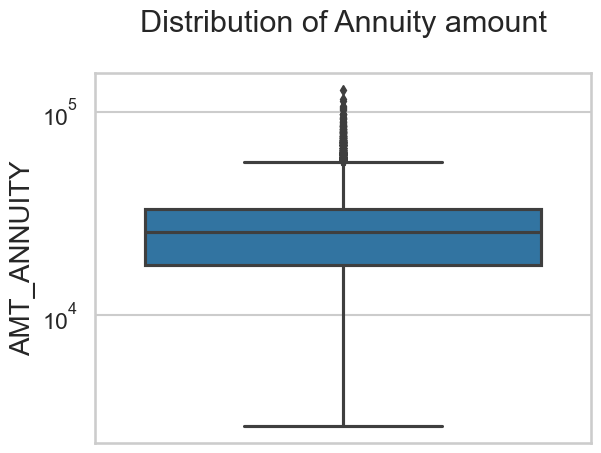

In [49]:
# Distribution of Annuity amount

univariate_numerical(data=target1_df,col='AMT_ANNUITY',title='Distribution of Annuity amount')

A few conclusions can be drawn from the graph above.

1.In the annuity amount, some outliers have been found.
2.The first quartile accounts for the majority of annuity clients since it has a larger annuity amount than the third quartile.

### Bivariate analysis for numerical variables

#### For Target 0

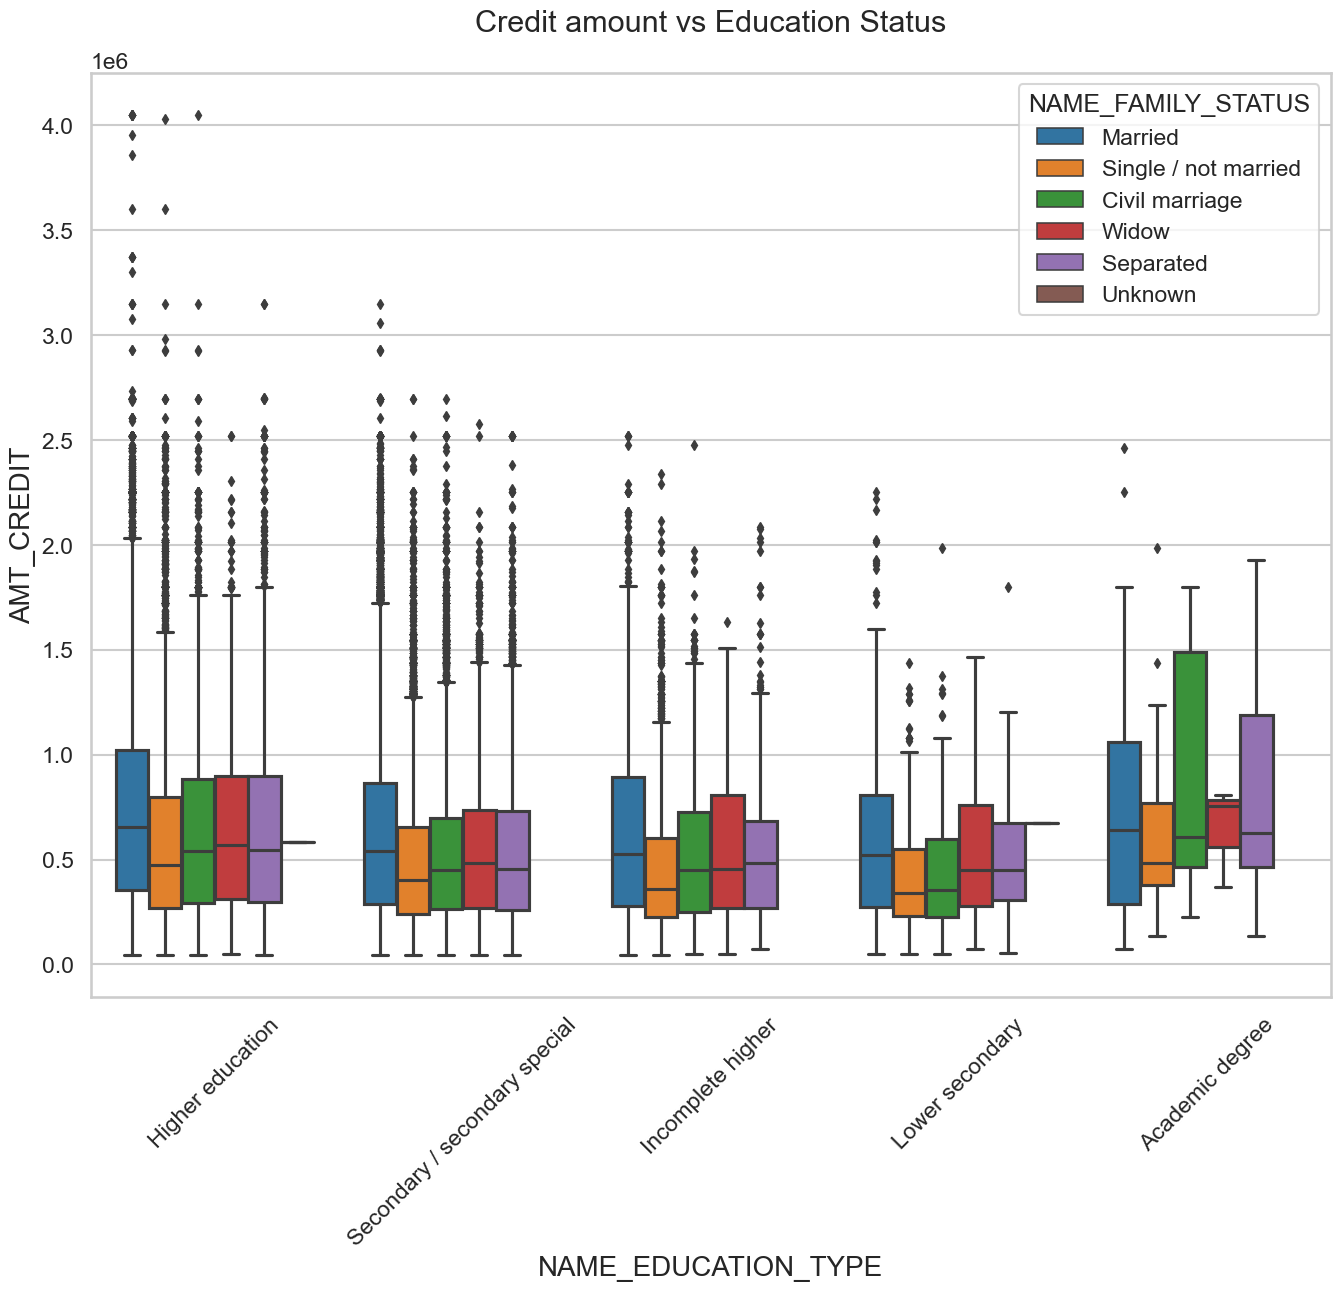

In [46]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

We can infer from the above box plot that academic degree holders with family status of "civil marriage," "marriage," and "separated" have more credits than those with other status. Additionally, there are more outliers in higher education in the categories of "marriage," "single," and "civil marriage." Most of the credits for civil unions for academic degrees are in the third quartile.

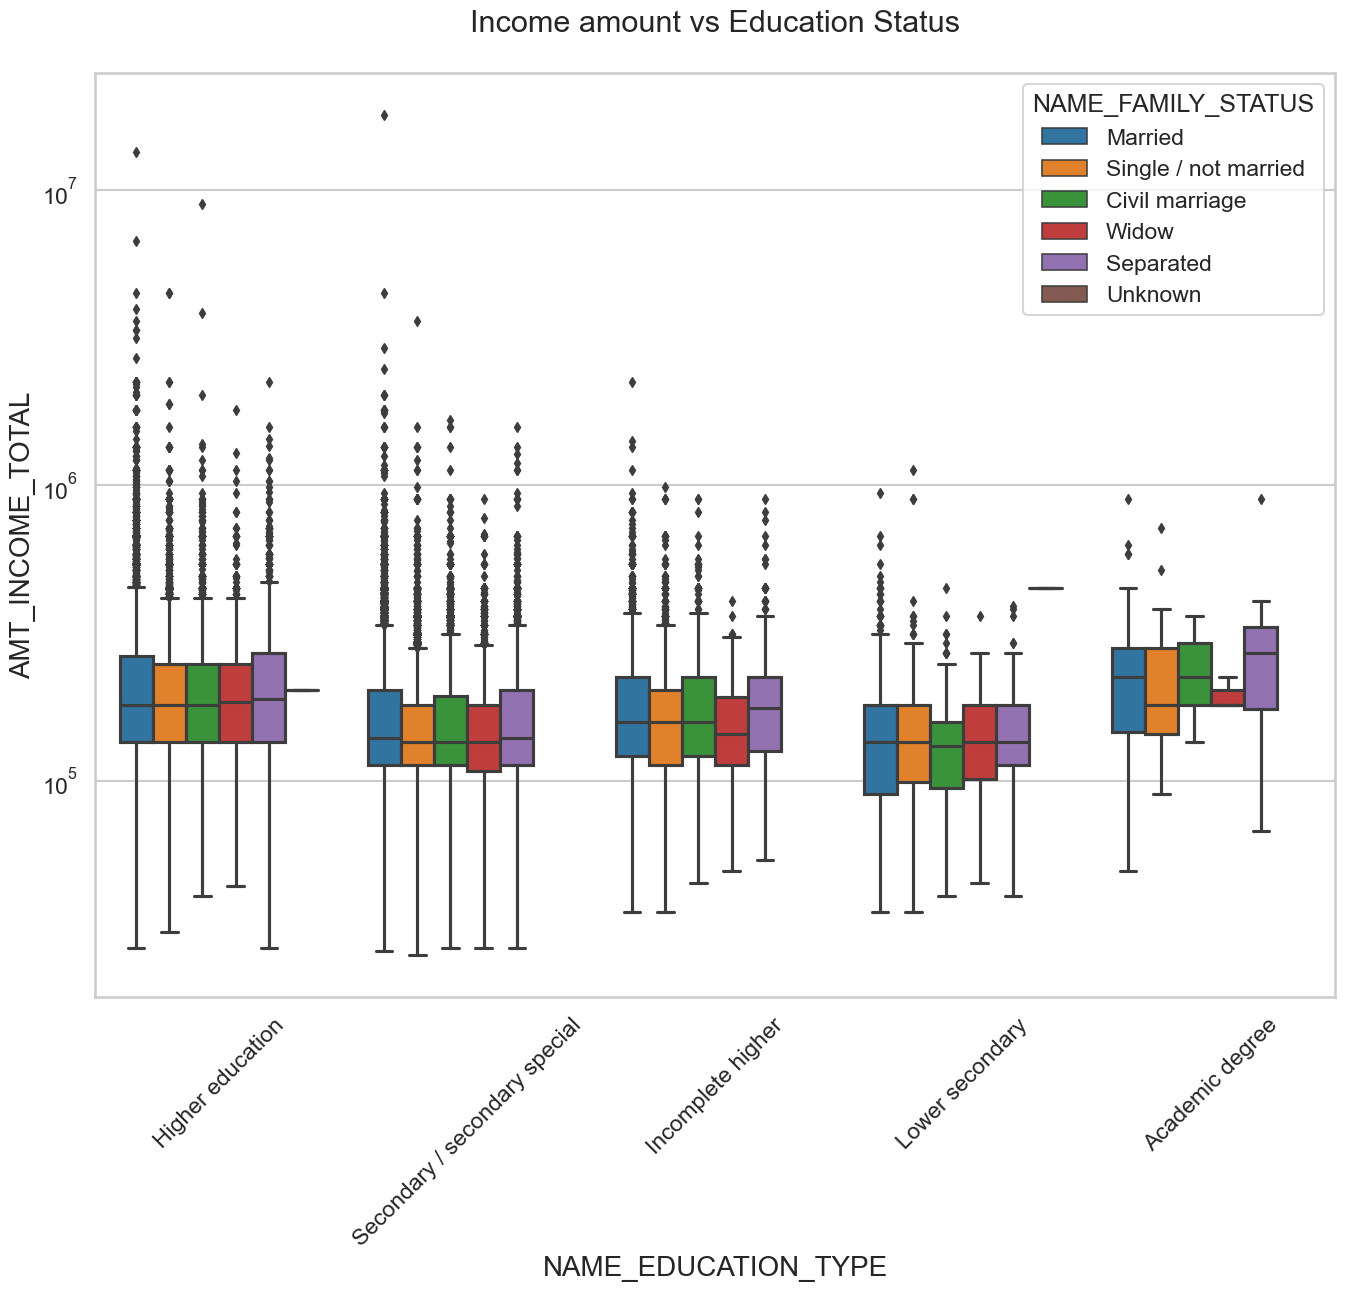

In [47]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

According to the boxplot above, the salary amount and family status are largely equivalent for the education type "Higher education." There are a lot of anomalies in it. Less outliers have academic degrees, yet their salary is a little greater than that of those with higher education. Lower secondary families with civil marriages typically earn less than other families.

#### For Target 1

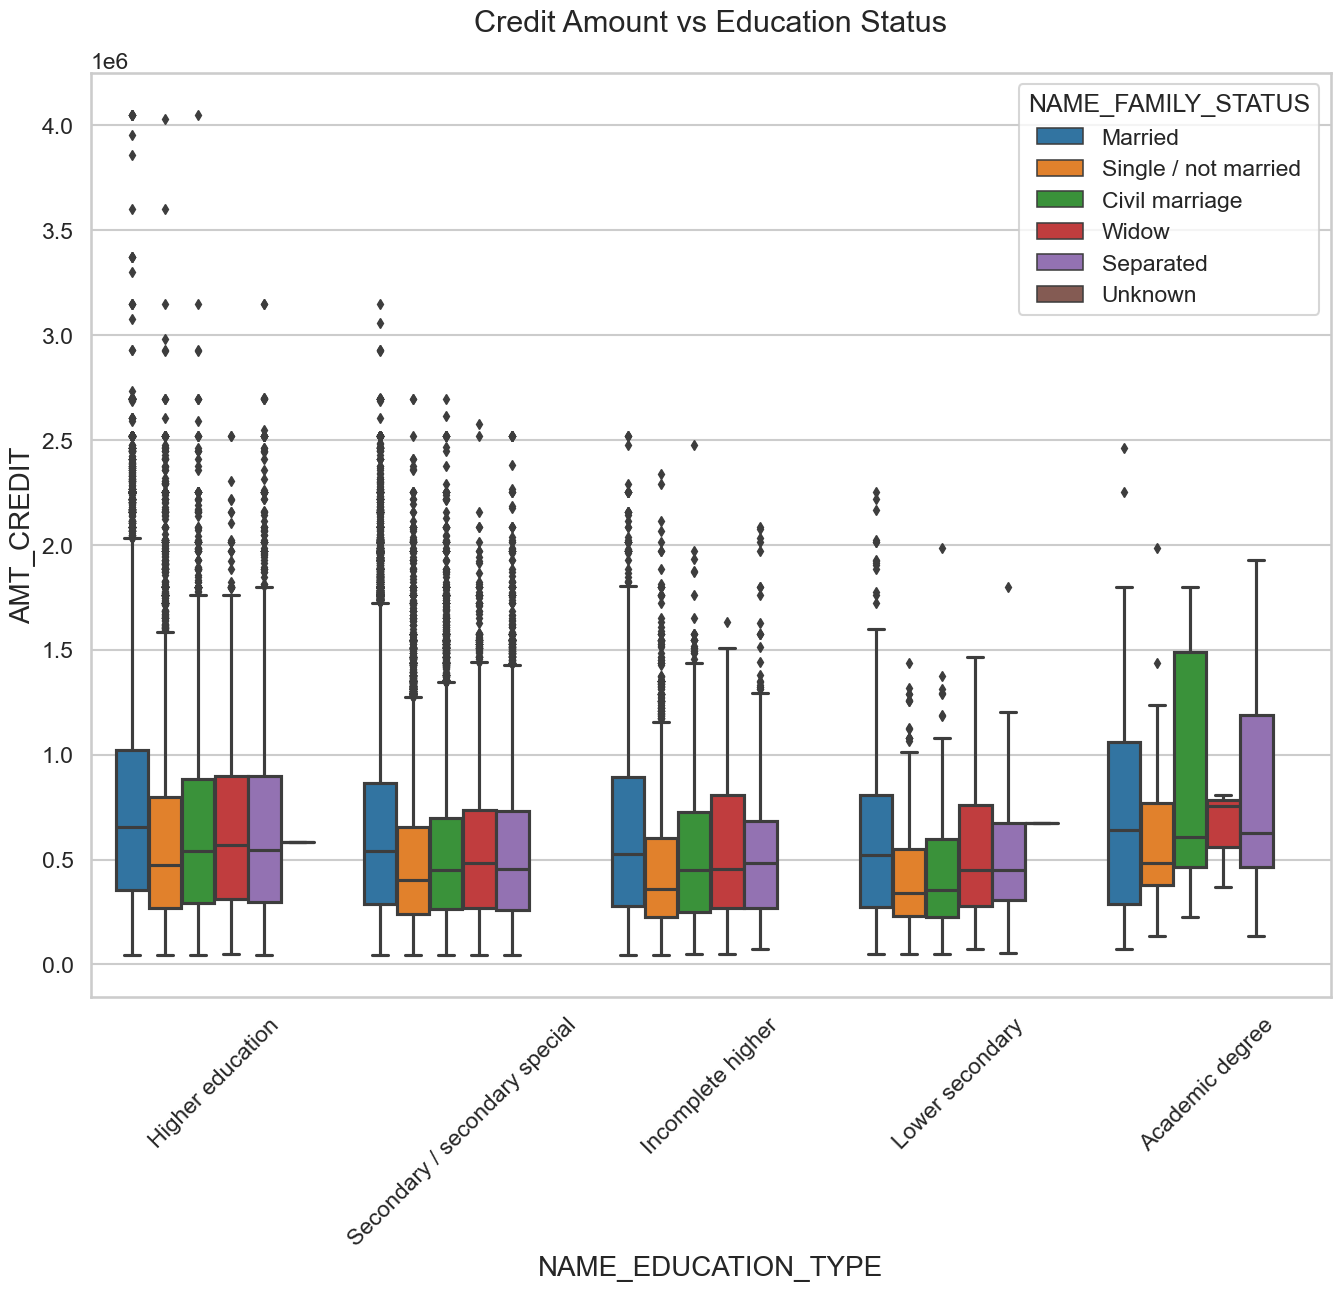

In [48]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

Target 0 is very similar to this. According to the above box plot, academic degree holders with family statuses of "civil marriage," "marriage," and "separated" have more credits than those with other statuses. Higher education and secondary education make up the majority of the outliers in the data. Most of the credits for civil unions for academic degrees are in the third quartile.

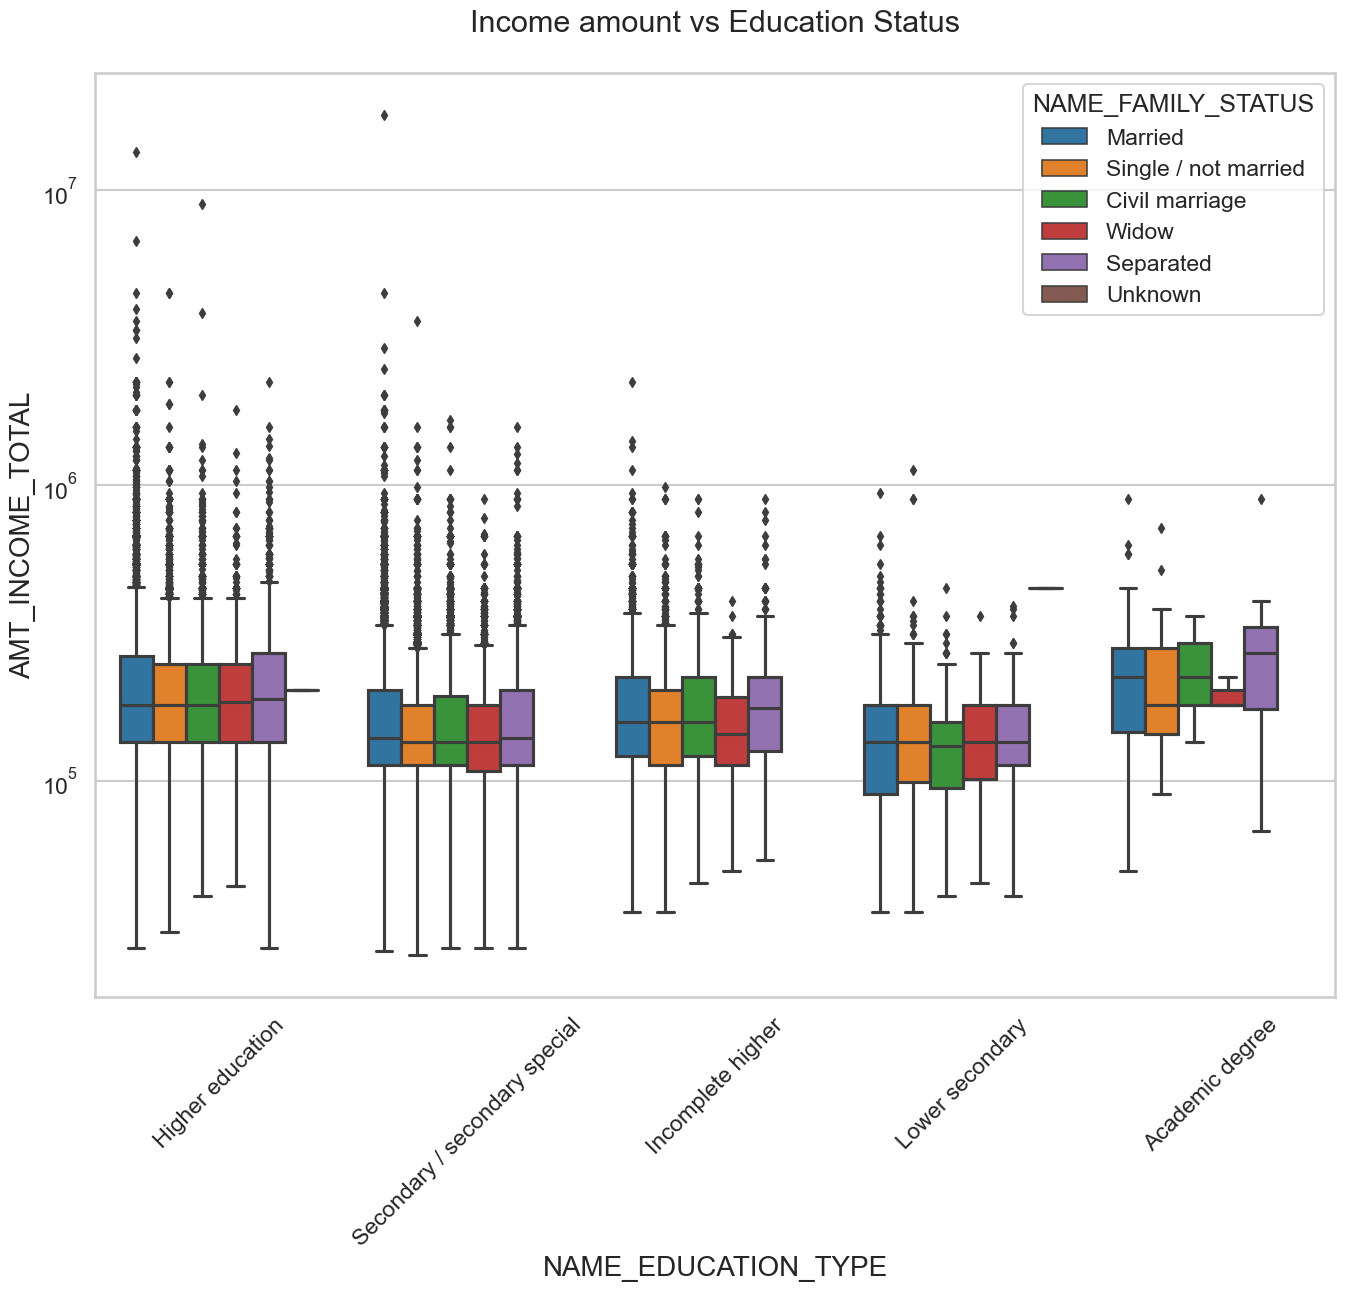

In [49]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

Have some similarities to Target 0, and according to the boxplot above for the education category "Higher education," income levels are often comparable to family circumstances. Less outliers have academic degrees, yet their salary is a little greater than that of those with higher education. Less money is made than at higher secondary schools.

In [50]:
# Reading the dataset of previous application

df1=pd.read_csv("previous_application.csv")

In [51]:
# Cleaning the missing data

# listing the null values columns having more than 30%

emptycol1=df1.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)

15

In [52]:
# Removing those 15 columns

emptycol1 = list(emptycol1[emptycol1.values>=0.3].index)
df1.drop(labels=emptycol1,axis=1,inplace=True)

df1.shape

(1670214, 22)

In [53]:
# Removing the column values of 'XNA' and 'XAP'

df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df1.shape

(69635, 22)

In [54]:
# Now merging the Application dataset with previous appliaction dataset

new_df=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')

In [55]:
# Renaming the column names after merging

new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [56]:
# Removing unwanted columns for analysis

new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

### Performing univariate analysis

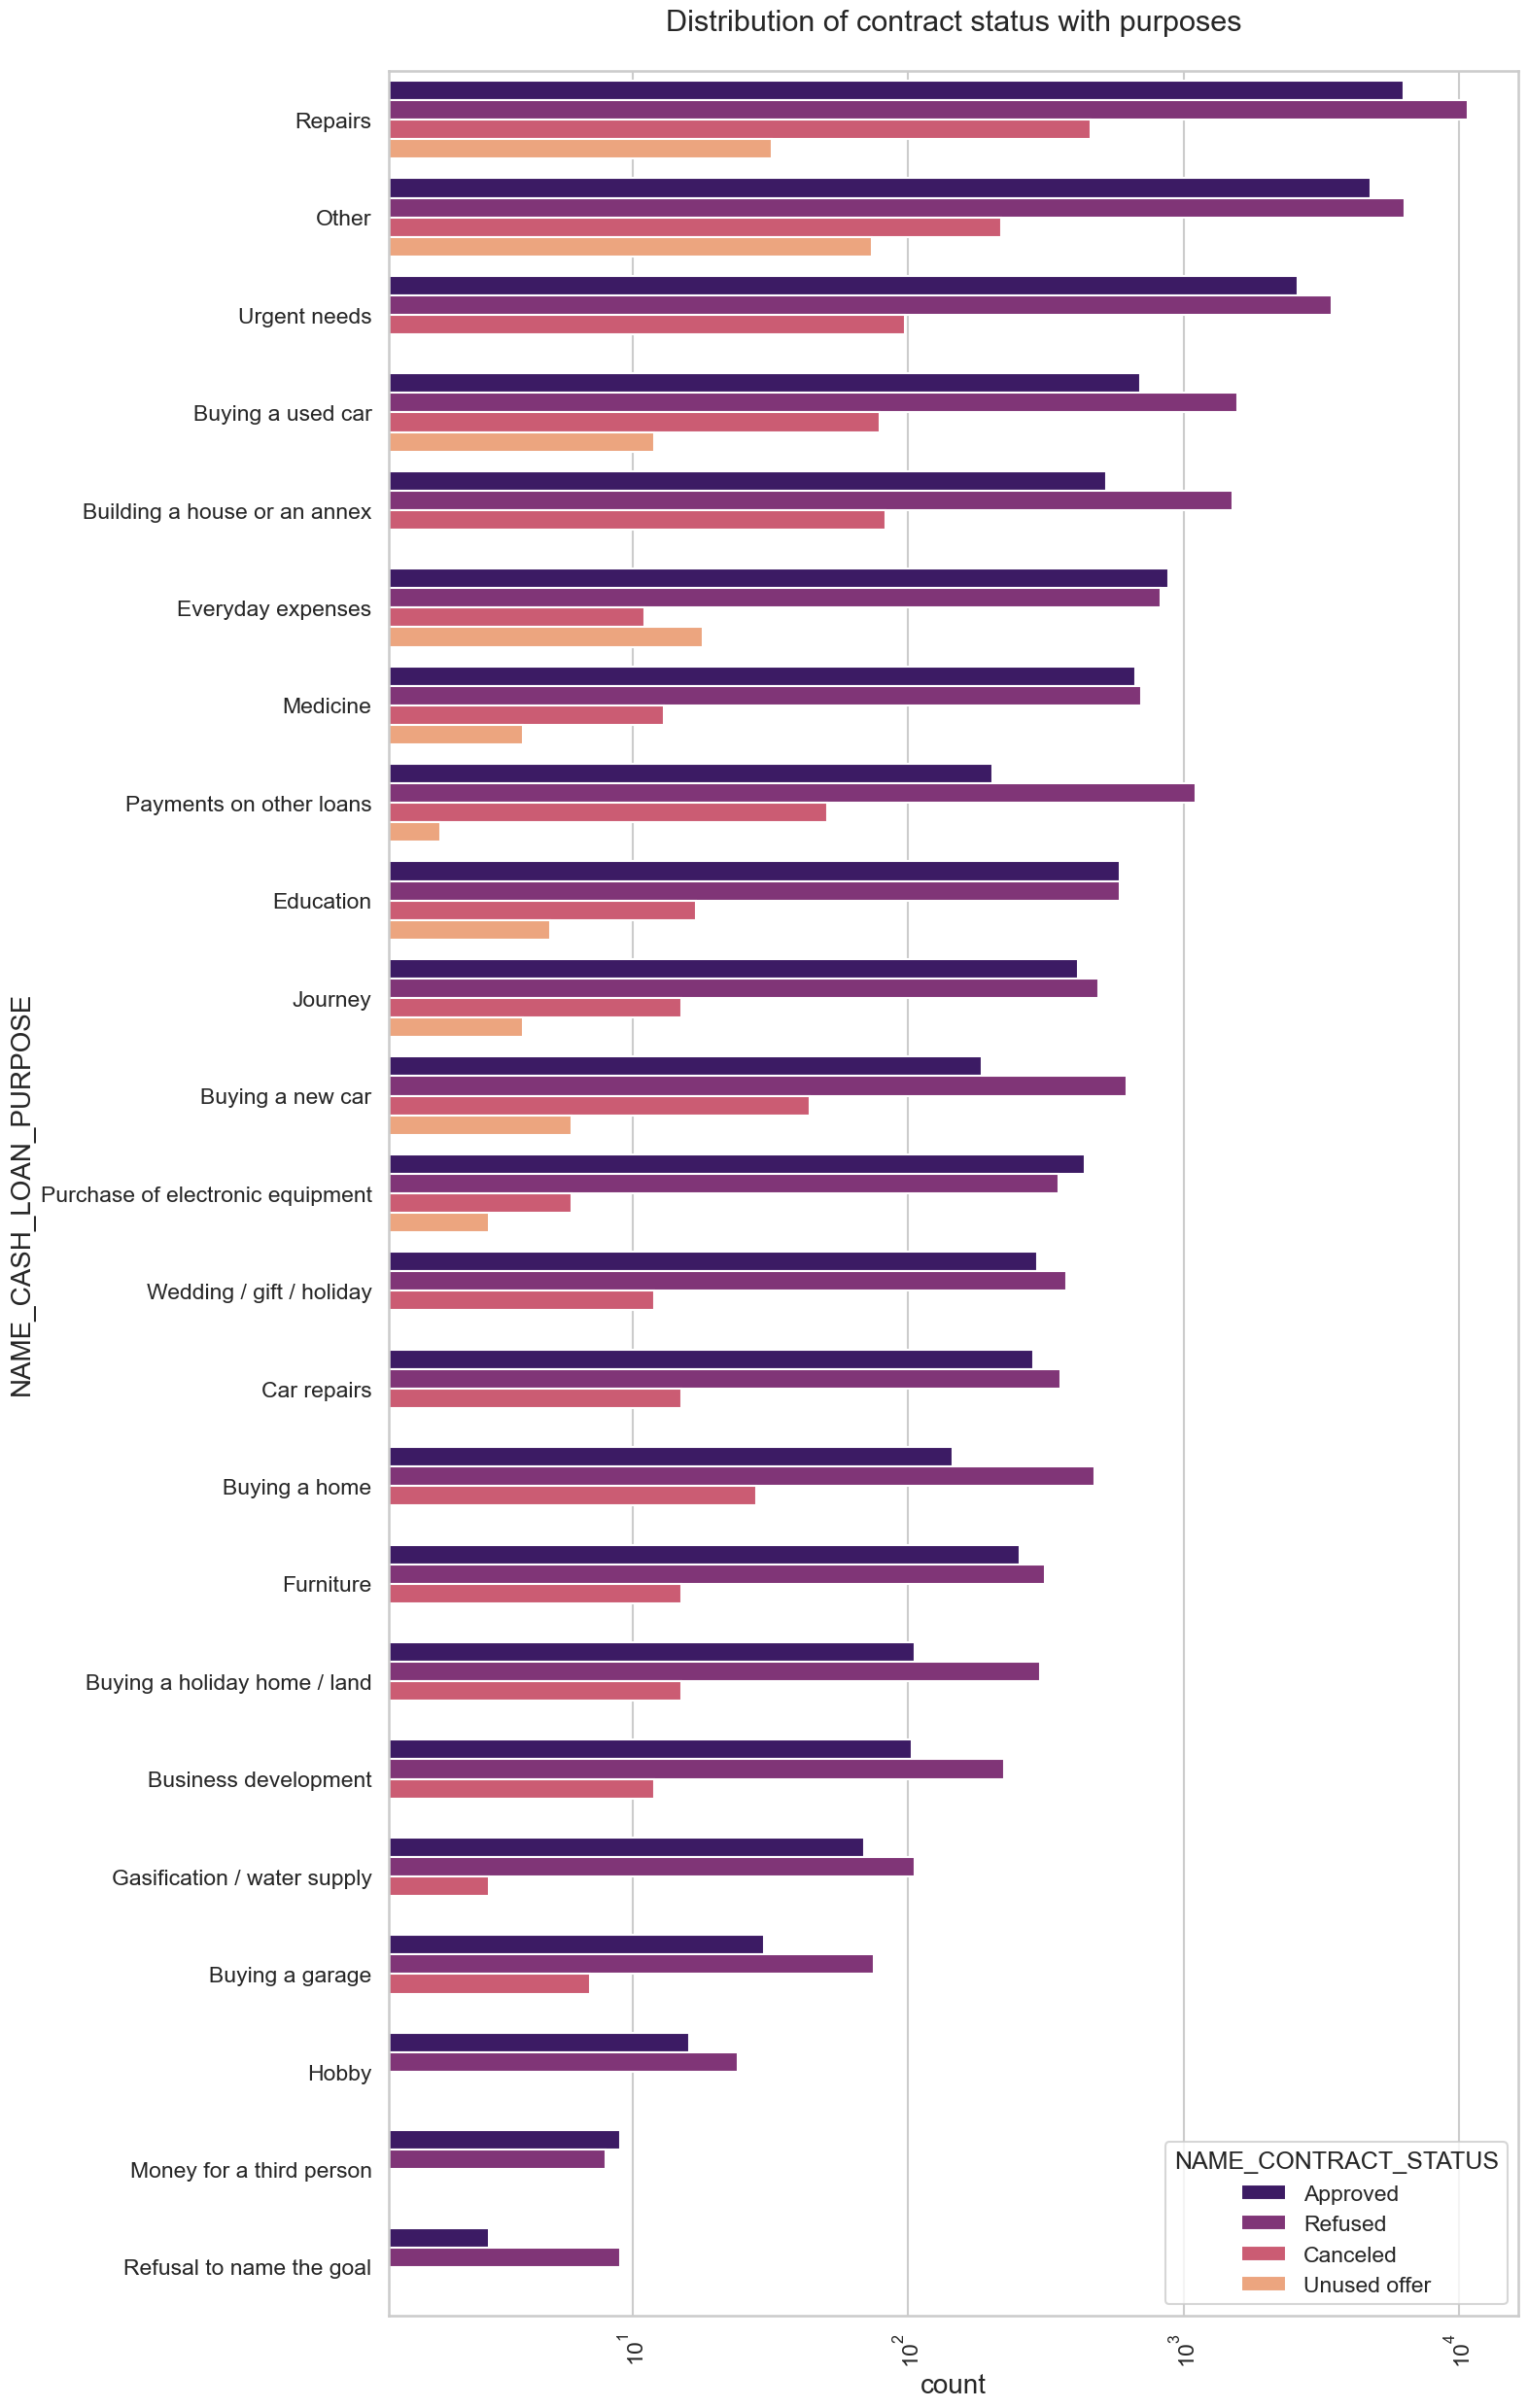

In [ ]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma') 

Conclusions from the plot above:

1.The majority of loan rejections were for'repairs'.
2.We have an equal amount of approvals and rejections for educational purposes.
3.Purchase of new cars and other loans are being rejected much more frequently than they are approved.

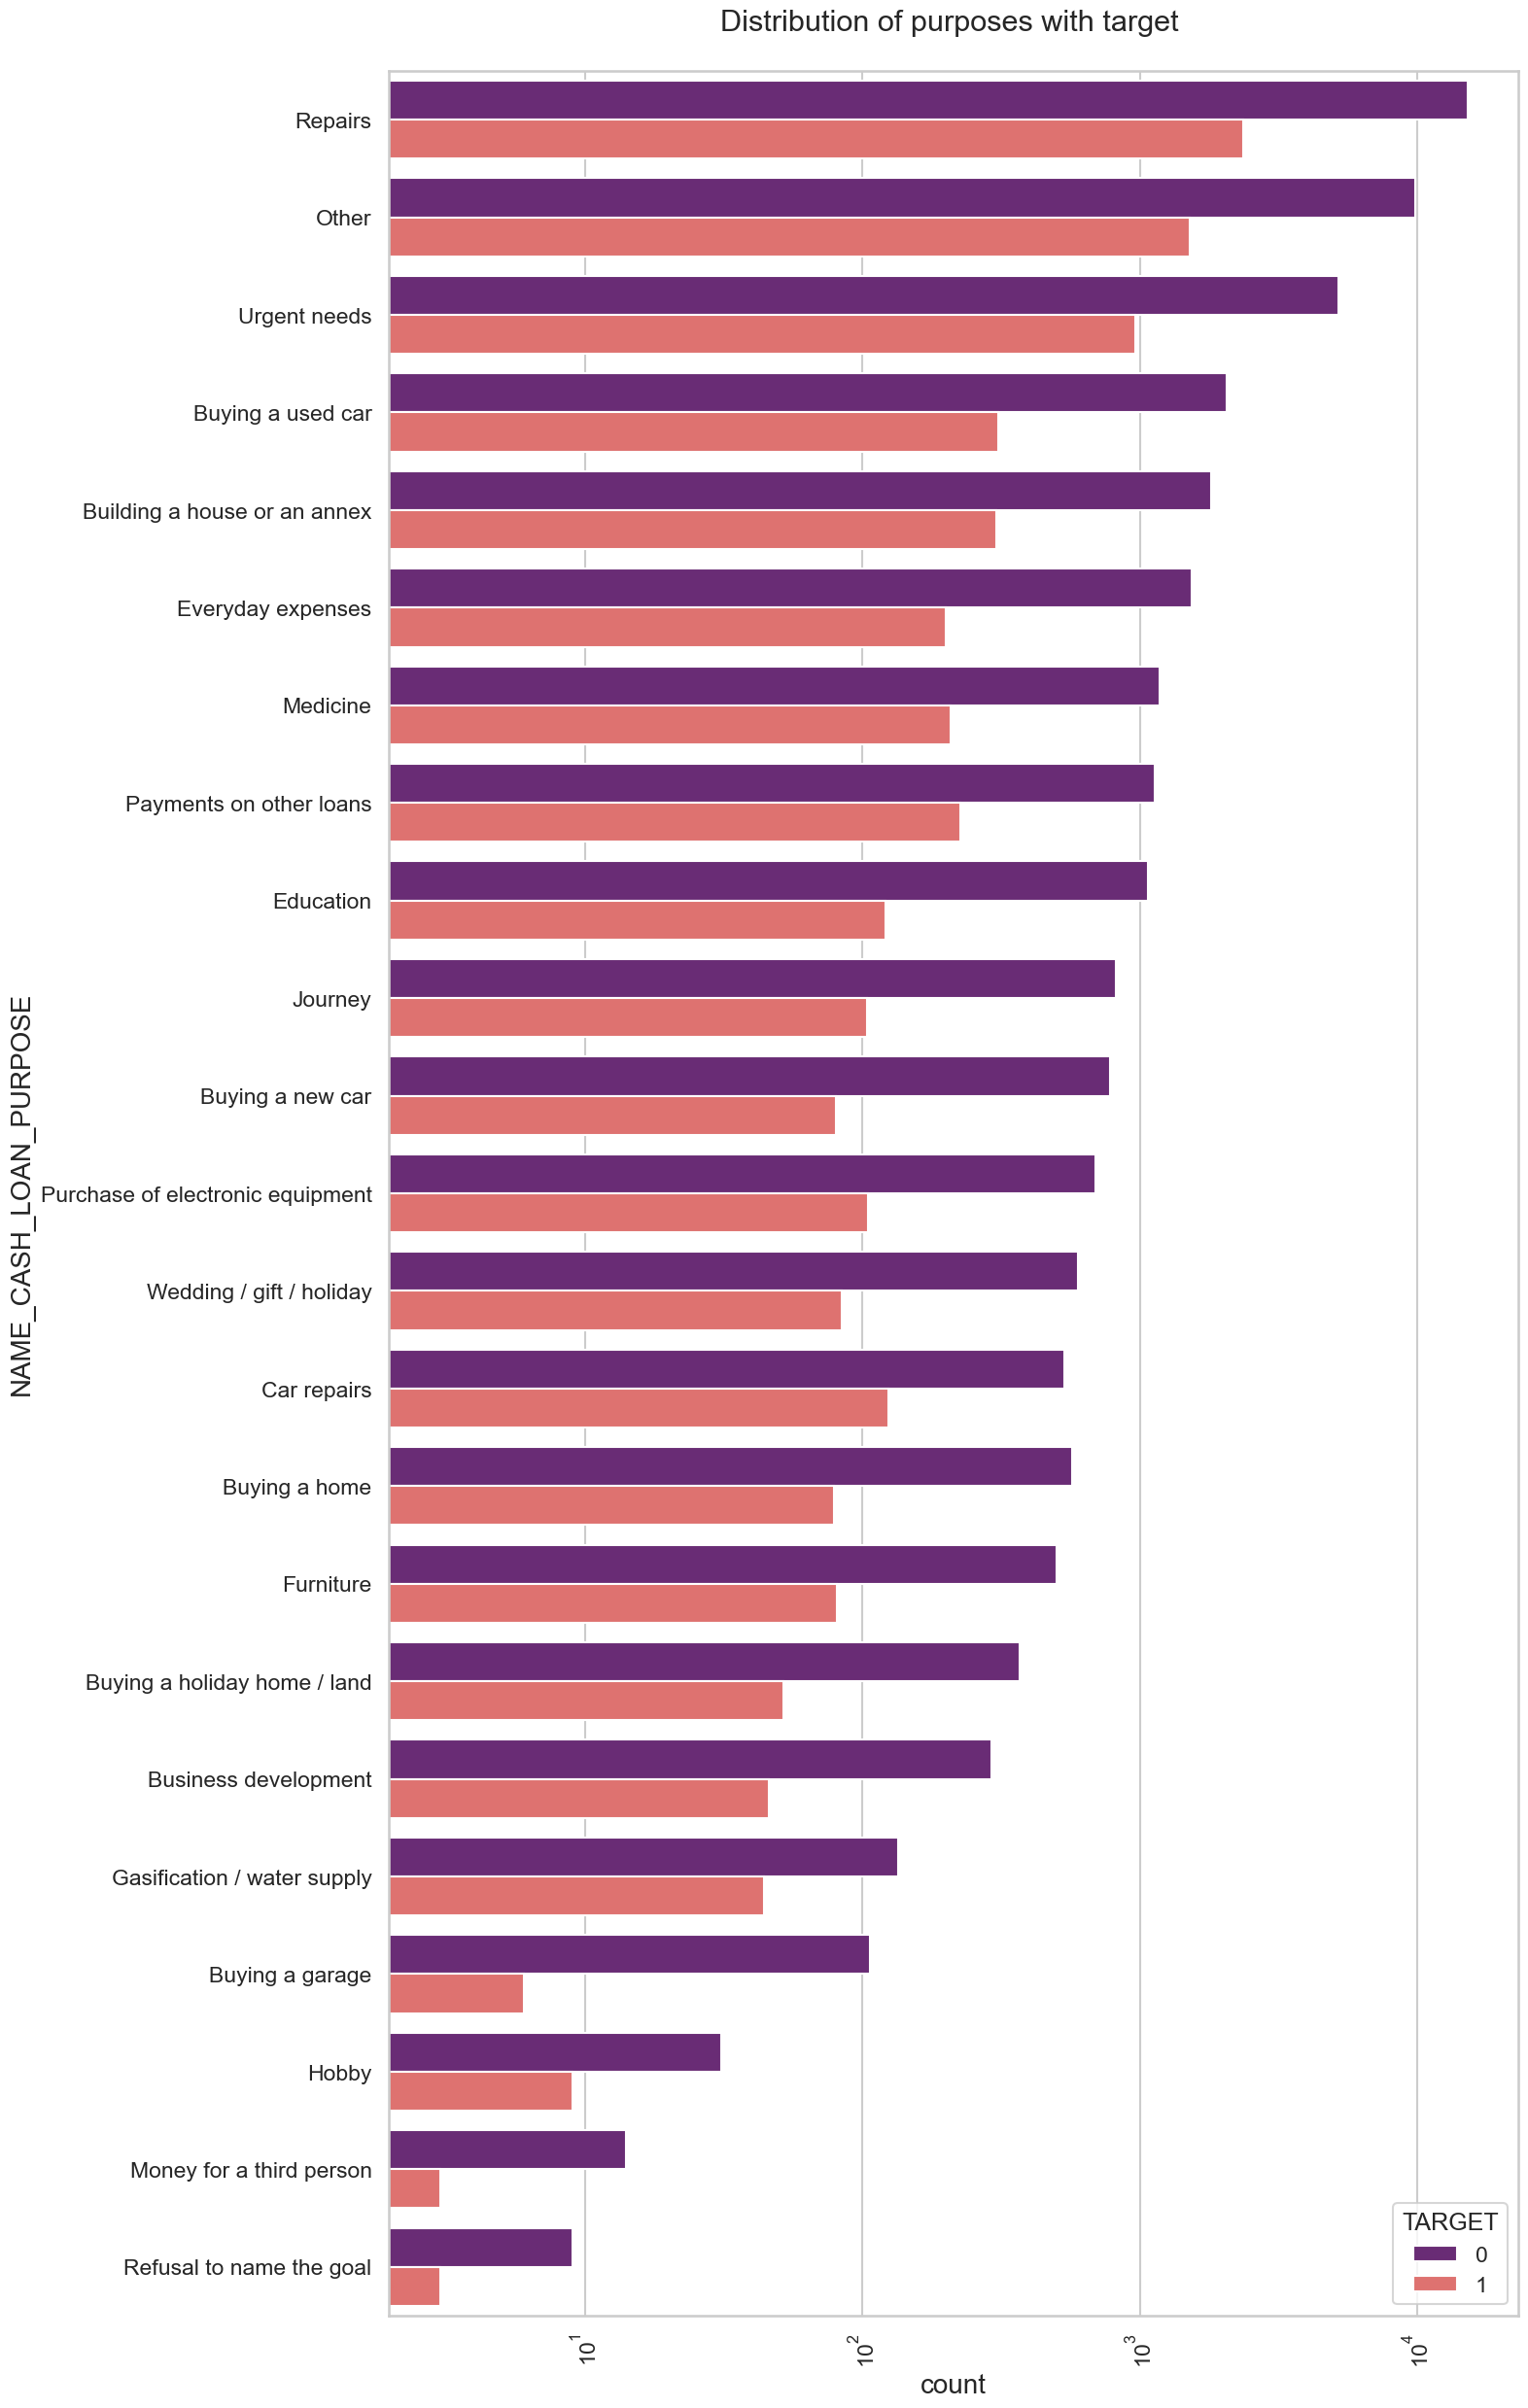

In [58]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma') 

Several conclusions from the above plot include:

1.Loan purposes including "Repairs" have more difficulty being paid on schedule.
2.The cost of a loan is rarely significantly higher than when one is struggling. They are "buying a garage," "buying a new car," "buying land," "business development," and "education."
Therefore, we can concentrate on these goals for which the client is experiencing just minor payment issues.

### Performing bivariate analysis

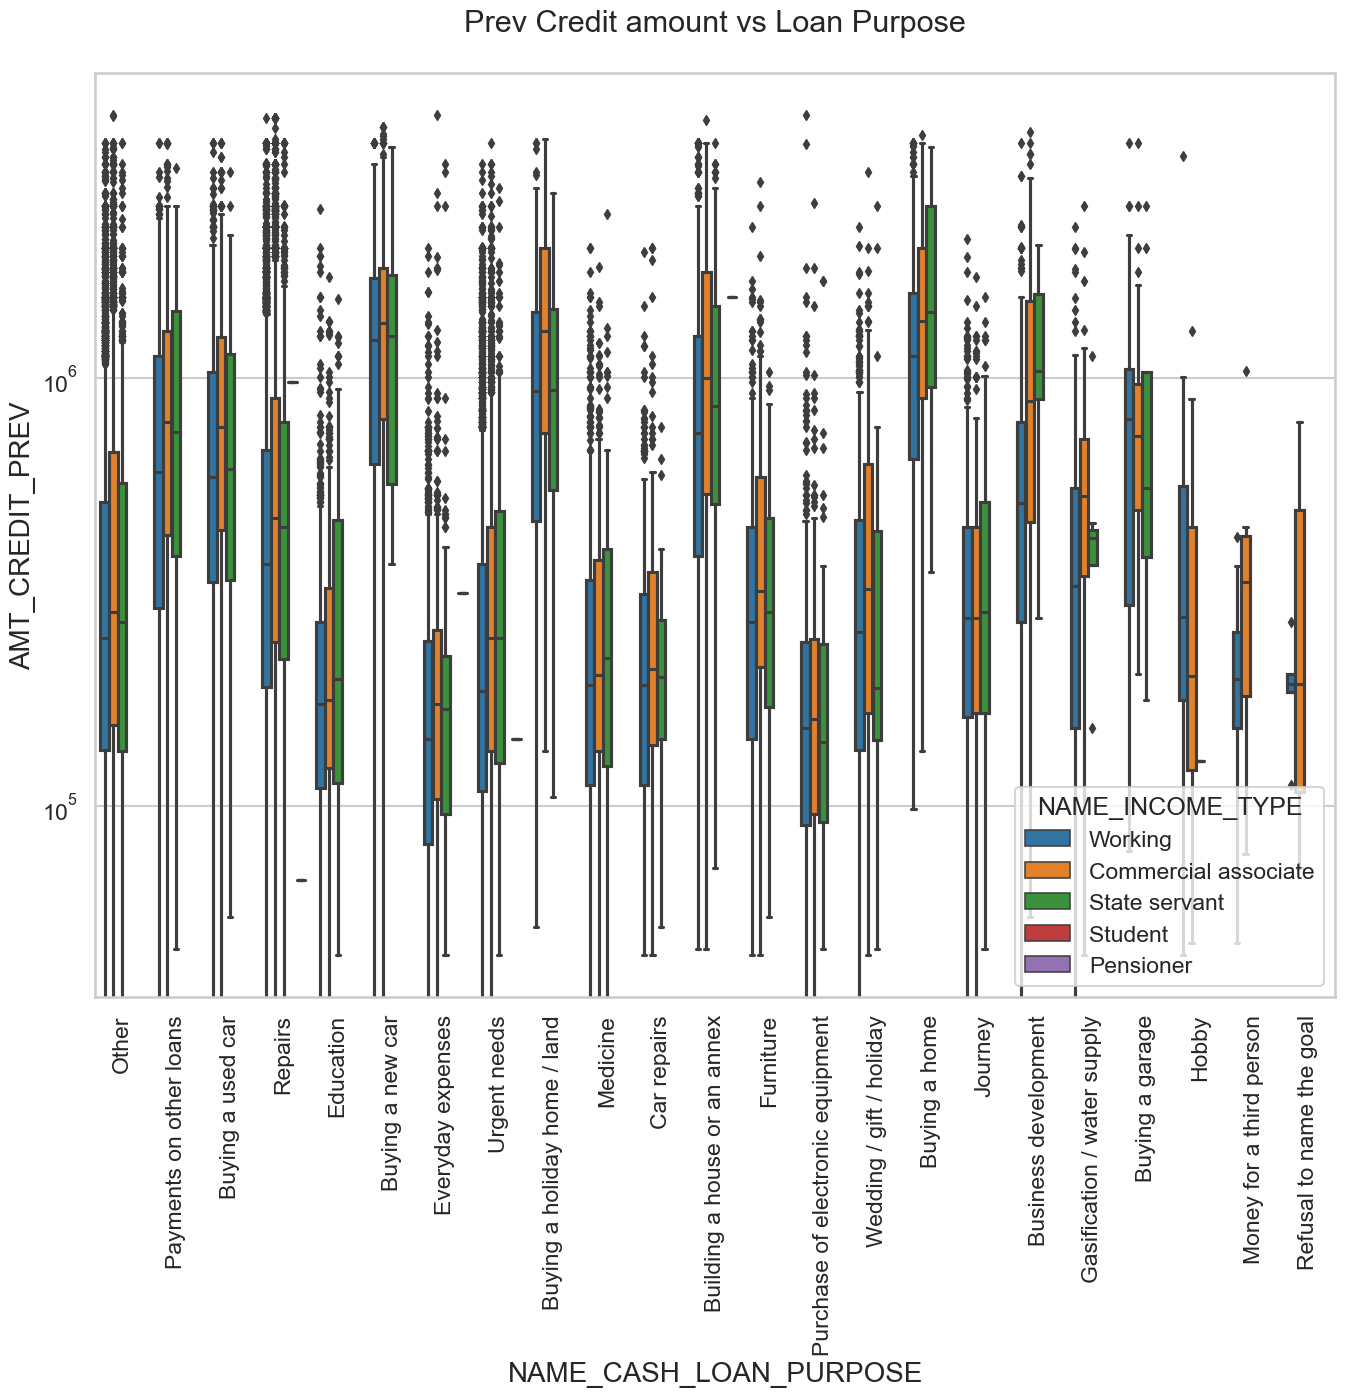

In [59]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_df1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

We can get the following conclusions from the above:

1.For loan objectives such as "buying a home," "buying a land," "buying a new car," and "building a house," the credit amount is larger.
2.State employees' income types receive a substantial amount of credit.
3.Less credits are requested when money is needed for a hobby or third party.

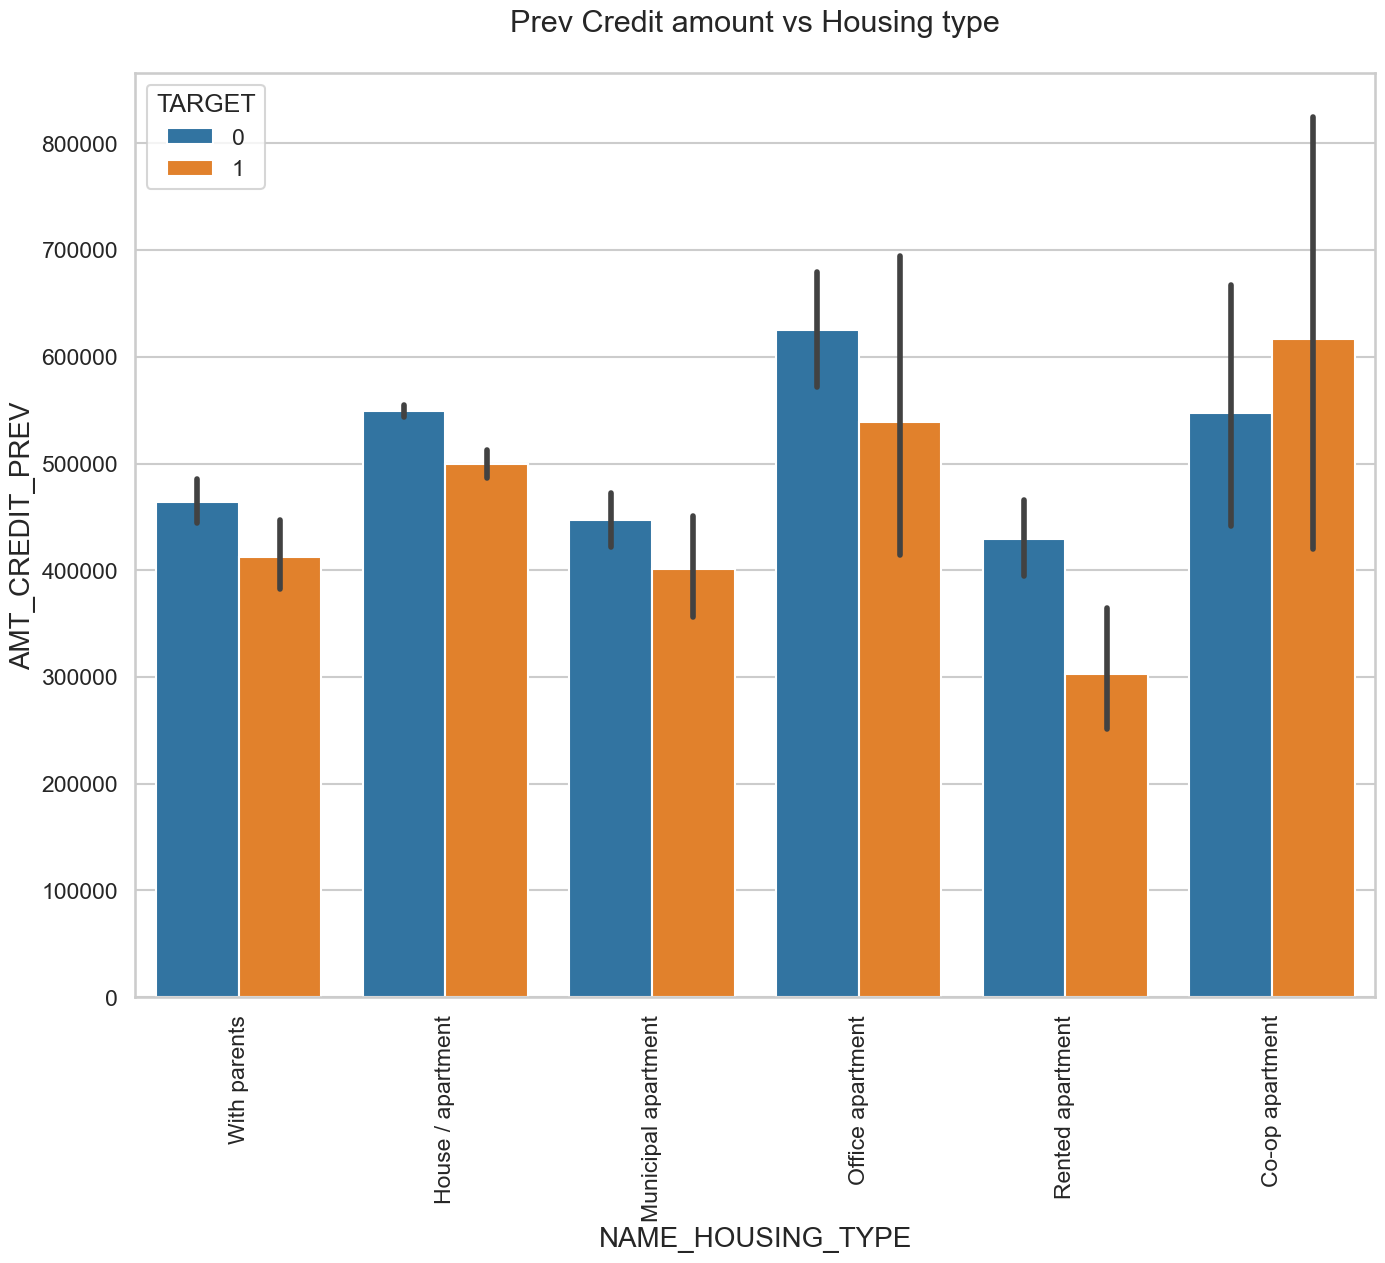

In [60]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Here, the office apartment has a higher target credit of 0 while the co-op apartment has a higher target credit of 1. We can therefore draw the conclusion that a bank should refrain from lending to the co-op flat housing type because of their payment issues. For successful payments, the bank can concentrate mostly on dwelling types such as those with parents, houses, apartments, or municipal apartments.

## CONCLUSION

1. For effective payments, banks should concentrate more on contract types such as "student," "pensioner," and "businessman" with dwelling types other than "co-op apartments."

2. Because there are the most failed payments for the income category "Working," banks should pay less attention to it.

3. The loan objective "Repair" also has a larger percentage of late payments that are unsuccessful.

4. Target as many clients who fall under the housing category "With Parents," as they experience the fewest failed payments.